<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Môn học:</strong> Trực quan hóa dữ liệu</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Lớp:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Thành viên:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">LAB 01</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">THU THẬP DỮ LIỆU VÀ TRỰC QUAN HÓA DỮ LIỆU</div>
</div>

# **Mục lục**

- [**Giới thiệu**](#intro)
    - [Mục tiêu đồ án](#objectives)
    - [Thông tin dữ liệu](#data)
- [**Thư viện sử dụng**](#packages)
- [**Thu thập dữ liệu**](#collect)
- [**Khám phá dữ liệu**](#eda)
    - [Tổng quan về dữ liệu](#eda1)
    - [EDA và tiền xử lí dữ liệu](#eda2)
        - [Thống kê mô tả](#eda21)
        - [Phân bố của dữ liệu dạng số](#eda22)
        - [Phân bố của dữ liệu dạng phân loại](#eda23)
    - [EDA và tiền xử lí dữ liệu](#eda3)
- [**Phân tích dữ liệu và trực quan hóa**](#analysis)
    - [1. Mức độ ảnh hưởng của thể loại âm nhạc đến sự thịnh hành của bài hát](#a1)
        - [1.1. Các thể loại nhạc nào thịnh hành nhất ở Việt Nam](#a11)
        - [1.2. Sự hiện diện của các thể loại âm nhạc trên thị trường âm nhạc Việt Nam](#a12)
    - [2. Nhạc Việt hay Nhạc Ngoại: Tổng quan thị trường nhạc Việt hiện nay?](#a2)
    - [3. Thời lượng như thế nào là tối ưu hiện tại?](#a3)
    - [4. Nghệ sĩ nào đang thống trị thị trường âm nhạc Việt Nam?](#a4)
        - [4.1. Nhạc Việt và nhạc ngoại: Xu hướng nghe nhạc nhghieeng về bên ngào ở thời điểm hiện tại? Và các nghệ sĩ nào đang thống trị nền âm nhạc?](#a41)
    - [5. Colab hay Solo: Đâu là xu hướng hiện nay?](#a5)
        - [5.1. So sánh giữa số lượng bài hát solo và bài hát hợp tác trên bảng xếp hạng](#a51)
        - [5. 2. Có phải nghệ sĩ càng nổi tiếng thì càng nhiều người muốn hợp tác không?](#a52)
    - [6. Xô đổ kỉ lục có khó không: Có phải càng về sau, thời gian để bức phá tiến vào bảng xếp hạng càng rút ngắn?](#a6)
- [**Kết luận**](#conclusion)
- [**Trích dẫn**](#references)


<a id="intro"></a>
# **I. Giới thiệu**
<a id="objectives"></a>
## **1. Mục tiêu phân tích:**
- Thị hiếu âm nhạc của người nghe ở thị trường Việt Nam
<a id="data"></a>
## **2. Thông tin dữ liệu:**


<a id="packages"></a>
# **II. Thư viện sử dụng**

In [ ]:
# Dùng để xuất svg cho plotly
!pip install kaleido

In [1]:
# Selenium
from dotenv import load_dotenv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

# Phân tích HTML
from bs4 import BeautifulSoup
import requests
import re
import os
import time
import glob

# Xử lý dữ liệu
import numpy as np
import pandas as pd

# Trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="collect"></a>
# **III. Thu thập dữ liệu**

Sau khi khảo sát và tìm hiểu về trình nghe nhạc trực tuyến **Spotify**, mục tiêu ban đầu mà nhóm xác định được cho việc thu thập dữ liệu là sẽ lấy tất cả các thông tin về bảng xếp hạng tại **Spotify Chart** và bài hát mà có thể lấy được từ trang web **Spotify**, bao gồm:
- URI
- Tên bài hát `track_name`
- Tên ca sĩ `artist_name`
- Thể loại `genre`
- Hãng đĩa/ Nhà phát hành `source`
- Thời lượng `duration`
- Số lượt nghe `streams`

Với mục tiêu này, việc thu thập dữ liệu sẽ được thực hiện với sự hỗ trợ của thư viện `BeautifulSoup`, `requests` và `Selenium` vì đây là một trang web động cần yêu cầu đăng nhập. Biến `BASE_URL` sẽ được sử dụng để lưu trữ URL của route đầu tiên của **Spotify chart** cần sử dụng để thu thập dữ liệu.

Đầu tiên chúng ta sẽ cài đặt ChromeDriver để sử dụng `Selenium`.

In [3]:
def initialize_chrome_driver():
   """
   Initialize Chrome WebDriver with specific configurations
   
   Args:
       user_name (str): Windows username for Chrome profile path
       
   Returns:
       webdriver.Chrome: Configured Chrome WebDriver instance
   """
   # Configure Chrome options
   chrome_options = Options()
   chrome_options.add_argument("--no-sandbox")
   chrome_options.add_argument("--start-maximized")
   
   # Configure download preferences
   chrome_options.add_experimental_option("prefs", {
       "download.default_directory": os.getcwd() + '.\\data',
       "download.prompt_for_download": False,
       "profile.default_content_setting_values.automatic_downloads": 1,
       "profile.default_content_setting_values.popups": 0,
   })
   
   # Initialize and return WebDriver
   return webdriver.Chrome(
       # Your path that contains chromedriver
       service=Service("C:/Program Files/chromedriver/chromedriver.exe"), 
       options=chrome_options
   )

Đây sẽ là phần xử lí login vào trang web Spotify chart, tên đăng nhập và mật khẩu sẽ được lưu trong file env để bảo mật thông tin.

In [21]:
def login (browser):    
    load_dotenv('.env.test')
    USER_NAME = os.getenv('USER_NAME')
    PASS_WORD = os.getenv('PASS_WORD')   
    
    login_button = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[data-testid='charts-login']"))
    )
    login_button.click()
    
    user_name = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-username']"))
    )
    user_name.click()
    user_name.send_keys(USER_NAME)
    
    pass_word = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-password']"))
    )
    pass_word.click()
    pass_word.send_keys(PASS_WORD)
    
    login = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='login-button']"))
    )
    login.click()
    
    WebDriverWait(browser, 10).until(EC.url_contains("https://charts.spotify.com/charts/overview/global"))

Tiếp theo chúng ta sẽ xử lí phần cookies vì nó sẽ che mất nút download:

In [9]:
def handle_cookies_button(browser):
    exit_button = WebDriverWait(browser, 10).until(
           EC.element_to_be_clickable((By.CSS_SELECTOR, "[id='onetrust-close-btn-container']"))
    )
    
    exit_button.click()

Mục tiêu là thu thập dữ liệu top 200 mỗi tháng từ đầu năm 2018 đến nay, nhưng biến động giữa 1 tuần về việc ra nhạc là không nhiều nên nhóm quyết định lấy ngày đầu, ngày 15 và ngày cuối trong một tháng để thu thập dữ liệu, thời gian bắt đầu từ đầu năm 2018 đến cuối tháng 1 năm 2025.

Và cuối cùng chúng ta sẽ dùng Selenium để thu thập dữ liệu tự động từ trang web Spotify chart và dữ liệu sẽ được lưu tại địa chỉ `../data`

In [ ]:
def download_spotify_charts(start_month=1, start_year=2018, end_month=1, end_year=2025):
    """
    Download Spotify charts data for specified months
    
    Args:
        start_month (int): Starting month (default: 1)
        start_year (int): Starting year (default: 2024)
        end_month (int): Ending month (default: 1)
        end_year (int): Ending year (default: 2025)
    """
    # Dictionary of days in each month
    months = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    
    # Initialize Chrome
    browser = initialize_chrome_driver()
    browser.get("https://charts.spotify.com/home")
    login(browser)
    
    handle_cookies_button(browser)
    
    # Initialize tracking variables
    current_month, current_year = start_month, start_year
    
    # Process charts from start month/year to end month/year
    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        days_to_scrape = [1, 15, months[current_month]]
        
        for day in days_to_scrape:
            url = f"https://charts.spotify.com/charts/view/regional-vn-daily/{current_year}-{current_month:02d}-{day:02d}"
            browser.get(url)
            
            try:
                download_button = WebDriverWait(browser, 10).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[data-encore-id="buttonTertiary"]'))
                )
                download_button.click()
            except Exception as e:
                print(f"Failed to download data for {current_year}-{current_month:02d}-{day:02d}: {e}")
        
        # Update month and year tracking
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    
    time.sleep(2)
    browser.quit()

download_spotify_charts()

Vậy là mỗi file csv đều có format tên là `regional-vn-weekly-2024-xx-xx.csv` với xx là ngày đầu, ngày 15 và ngày cuối của mỗi tháng. Tất cả các file này sẽ được lưu tại thư mục `../data` và tất cả sẽ được hợp lại thành file tên `spotify_chart.csv` và thêm cột `date` để biết được ngày thu thập dữ liệu.

In [ ]:
path = '../data'
all_files = glob.glob(f"{path}/*.csv")

df_list = []

# Lấy ngày trong filename
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Hợp các dataframe lại
raw_df = pd.concat(df_list, ignore_index=True)

# Lưu dữ liệu vào file csv
raw_df.to_csv('../data/spotify_chart.csv', index=False)

raw_df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
0,1,spotify:track:6XJsQ5nqCu8RUv9pv1iz1x,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,2,22216
1,2,spotify:track:0ZP4bO2ywAv44HiEzzHaq5,"Lê Hiếu, SOOBIN, Touliver",Ngày Mai Em Đi,Space Speakers,2,2,2,12878
2,3,spotify:track:08bNPGLD8AhKpnnERrAc6G,"Marshmello, Anne-Marie",FRIENDS,Atlantic Records UK,3,4,2,9858
3,4,spotify:track:2ARqIya5NAuvFVHSN3bL0m,"Zedd, Maren Morris, Grey",The Middle,UMGRI Interscope,3,3,2,9260
4,6,spotify:track:5yFSF6qQA1rcLsQRnBsZgb,"Alan Walker, Noah Cyrus, Digital Farm Animals,...",All Falls Down (feat. Juliander),Kreatell Music,6,7,2,8471
...,...,...,...,...,...,...,...,...,...
33937,196,spotify:track:0gzpqwLf1jhNjnSJEyweAX,"Kuun Đức Nam, Linh Thộn",Tình cờ yêu em,MaiDao Music,9,167,523,17345
33938,197,spotify:track:0Lf0ydJp4nbcEkYgPtIUuD,Ronboogz,Khi Mà,MaiDao Music,122,180,170,17311
33939,198,spotify:track:5Ad2WBPQGCa9bPskbob5dN,VCC Left Hand,Mình Lượn Lờ Làm Wen (NOVINA),VCC Left Hand,198,-1,1,17229
33940,199,spotify:track:37uug3gaq86yvFTjV6WkaV,Kay Chau Anh,Think About U,Yin Yang Media,89,195,78,17215


Vậy là chúng ta đã thu thập xong được dữ liệu từ trang web Spotify chart, tiếp theo chúng ta sẽ tiếp thục thu thập các trường còn thiếu và các trường còn thiếu này sẽ được lấy từ Spotify. Việc liên kết giữa những bài hát này và chúng trên Spotify sẽ thông qua `uri` của bài hát, vì biết rằng mỗi bài hát chỉ có một URI duy nhất. Và trang web Spotify chart cũng được cung cấp thông tin từ API của Spotify.

Đầu tiên, chúng ta sẽ lấy trích lấy URI của mỗi bài hát từ `raw_df` và lưu vào biến `track_id`.

In [159]:
def extract_id(uri):
    return uri.split(':')[-1]

track_id = []
for uri in raw_df['uri']:
    track_id.append(extract_id(uri))

Tiếp theo, chúng ta sẽ sử dụng `track_id` này để lấy được thông tin bài hát từ Spotify, cụ thể là `duration` - thời lượng, `release_date` - ngày phát hành của bài hát và `streams` - tổng số lượt nghe đến thời điểm hiện tại. Nhưng trước đó chúng ta phải gom nhóm các `track_id` trùng nhau và lấy ra một `track_id` duy nhất. Đồng thời chúng ta cũng sẽ sử dụng cột `id` mới thay cho `uri` cũ với dữ liệu vừa mới được định dạng này.

In [ ]:
unique_tracks = raw_df.drop_duplicates(subset=['uri'])
track_id = unique_tracks['uri'].tolist()
track_id = [extract_id(uri) for uri in track_id]
raw_df['id'] = raw_df['uri'].apply(extract_id)
raw_df.drop(columns=['uri'], inplace=True)

Đây là hàm lấy dữ liệu của mỗi bài hát từ Spotify, chúng ta sẽ sử dụng `Selenium` để tự động quá trình này: phân tích HTML để lấy `duration`, `release_date`, dùng XPath để lấy `streams` và trả về một dictionary chứa các thông tin này.

In [7]:
def get_track_info(track_id):
    url = f"https://open.spotify.com/track/{track_id}"
    fail_request = 1
    browser = initialize_chrome_driver()
    browser.get(url)
    time.sleep(2)
    try:
        playcount_element = browser.find_element(By.CSS_SELECTOR, 'span[data-testid="playcount"]')
        
        playcount = playcount_element.text if playcount_element else 'Request failed'
    except Exception as e:
        fail_request = track_id
        print(f"Failed to get play count")
    
    browser.quit()
    
    time.sleep(1)
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            release_date_tag = soup.find('meta', {'name': 'music:release_date'})
            duration_tag = soup.find('meta', {'name': 'music:duration'})
            
            release_date = release_date_tag['content'] if release_date_tag else 'Request failed'
            duration = duration_tag['content'] if duration_tag else 'Request failed'
            
            return release_date, duration, playcount, 1
        else:
            return 'Request failed', 'Request failed', 'Request failed', track_id
    except Exception as e:
        return 'Request failed', 'Request failed', 'Request failed', track_id

Tiếp theo, chúng ta sẽ lặp qua các `track_id` và gộp các thông tin vào DataFrame `raw_df`. Nhưng trong đó, như đã trình bày ở trên, chúng ta lấy dữ liệu hằng ngày nên `streams` hiện có trong `raw_df` vẫn là stream hằng ngày. Nên việc cần làm bây giờ là xóa cột `streams` và thêm cột `streams` mới với giá trị là stream cuối cùng của mỗi bài hát, tức tổng số lượt nghe đến thời điểm hiện tại. Mà thuộc tính này chúng ta sẽ thu thập ngay sau đây.

In [ ]:
# Xóa cột streams cũ
raw_df.drop(columns=['streams'], inplace=True)

# Bắt đầu thu thập dữ liệu
release_dates = []
durations = []
streams = []
fail_reqs = []

for id in track_id:
    release_date, duration, stream, fail_req = get_track_info(id)
    time.sleep(2)
    print(release_date, duration, stream)
    release_dates.append(release_date)
    durations.append(duration)
    streams.append(stream)
    fail_reqs.append(fail_req)
    
raw_df['release_date'] = release_dates
raw_df['duration'] = durations
raw_df['streams'] = streams

In [170]:
raw_df.sample(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
19557,113,Sơn Tùng M-TP,Buông Đôi Tay Nhau Ra,Universal Music Indochina Distributed Labels,108,114,94,0YRtuiIMa3FM3LywGlJIii,2013-01-01,227,"20,741,034"
7790,95,Imagine Dragons,Believer,Kid Ina Korner / Interscope,72,96,284,0pqnGHJpmpxLKifKRmU6WP,2019-01-18,179,"2,476,251,414"
24443,185,BTS,Yet To Come (Hyundai Ver.),BIGHIT MUSIC,3,139,23,4ncTUgTfUV3wrjTPzKvn01,2022-09-23,224,"17,375,777"
32861,186,Wxrdie,Đau Đầu,Universal Music Indochina Distributed Labels,186,-1,1,24vkxodYasYenh3U8TUqVy,2024-11-12,224,"977,333"
11477,20,Charlie Puth,I Warned Myself,Artist Partner,20,22,10,3707IBa4HnS3zDDoWfeUBl,2019-08-27,211,"46,257,517"


Vậy là chúng ta đã hoàn thành việc thu thập dữ liệu còn thiếu từ Spotify, tiếp theo chúng ta sẽ lưu dữ liệu vào file `../data/spotify_chart_v1.csv` để tái sử dụng dữ liệu và tiến hành khám phá dữ liệu.

In [ ]:
raw_df.to_csv('../data/spotify_chart_v1.csv', index=False, encoding='utf-8')

<a id="eda"></a>
# **IV. Khám phá dữ liệu**

Trước khi đến phần khám phá dữ liệu, chúng ta sẽ đọc dữ liệu từ file `../data/spotify_chart_v1.csv` đã lưu ở phần trước và bắt đầu khám phá.

In [ ]:
raw_df = pd.read_csv('../data/spotify_chart_v1.csv', encoding='utf-8')
raw_df.head(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,2,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
1,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,18,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
2,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,19,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
3,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,33,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"
4,1,Mỹ Tâm,Người Hãy Quên Em Đi,MT Entertainment,1,1,48,6XJsQ5nqCu8RUv9pv1iz1x,2017-08-02,218,"23,041,707"


<a id="eda1"></a>
## **1. Tổng quan về dữ liệu**

Ở phần này thì chúng ta sẽ khám phá về cấu trúc của dữ liệu. Đầu tiên, chúng ta sẽ kiểm tra số dòng và số cột của dữ liệu để chắc rằng dữ liệu phù hợp với yêu cầu về cấu trúc của bài (hơn 3000 dòng trước tiền xử lí).

**Kích thước dữ liệu:**

In [6]:
print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

Number of rows: 20276
Number of columns: 8


Dữ liệu đã đạt yêu cầu của đề, tuy nhiên, ta thấy lặp khá nhiều dữ liệu của một bài hát (tức một record) do việc thu thập dữ liệu từ bảng xếp hạng hàng ngày. Vì vậy, chúng ta sẽ tiến hành xử lí dữ liệu trùng lặp này bằng cách giữ lại duy nhất một record cho mỗi `id` bài hát với `days_on_chart` lớn nhất, tức số ngày bài hát đứng trên bảng xếp hạng cuối cùng.

In [ ]:
raw_df = raw_df.loc[raw_df.groupby('id')['days_on_chart'].idxmax()].reset_index(drop=True)

print(f"Number of rows: {raw_df.shape[0]}")
print(f"Number of columns: {raw_df.shape[1]}")

display(raw_df.head())

Number of rows: 3487
Number of columns: 11


,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,73,Red Velvet,RBB (Really Bad Boy),SM Entertainment,14,79,15,006LuHbY5Tt9dhbdSOnVq6,2018-12-14,212,"646,798,750"
1,68,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,39,60,27,00Blm7zeNqgYLPtW6zg8cj,2021-11-05,194,"685,454,538"
2,147,j-hope,Safety Zone,BIGHIT MUSIC,15,168,18,00I41xsW6SunZDJ5fB8KAd,2022-07-15,165,"43,608,495"
3,150,"Chillies, SUNI, Rhymastic",Cứ Chill Thôi,WM Vietnam,4,86,1272,014DA3BdnmD3kI5pBogH7c,2020-07-24,240,"1,574,927,209"
4,119,"Da LAB, JGKiD (Da LAB), MPaKK",CILU,Yin Yang Media,66,99,31,0167mYf0UIa3qBqy4NZgt5,2021-02-21,282,"730,068"


Số lượng record sau khi xử lí trùng lặp sẽ giảm đi rất nhiều, nhưng vẫn đảm bảo đủ dữ liệu cho việc khám phá và trực quan hóa dữ liệu theo yêu cầu của đề.

Tiếp theo, chúng ta sẽ kiểm tra xem kiểu dữ liệu của các cột trong dữ liệu để biết được cần phải xử lí kiểu dữ liệu của các cột nào trong dữ liệu ở phần tiền xử lí.

**Kiểu dữ liệu của các cột:**

In [183]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           3487 non-null   int64 
 1   artist_names   3487 non-null   object
 2   track_name     3487 non-null   object
 3   source         3487 non-null   object
 4   peak_rank      3487 non-null   int64 
 5   previous_rank  3487 non-null   int64 
 6   days_on_chart  3487 non-null   int64 
 7   id             3487 non-null   object
 8   release_date   3487 non-null   object
 9   duration       3487 non-null   int64 
 10  streams        3487 non-null   object
dtypes: int64(5), object(6)
memory usage: 299.8+ KB


**Thông tin về các cột trong dữ liệu**

Chúng ta có 11 cột trong dữ liệu, với tất cả các cột đều có kiểu dữ liệu khác nhau:
Ý nghĩa của các cột trong dữ liệu như sau:
| Tên cột     | Ý nghĩa                           | Kiểu dữ liệu       |
|-----------------|---------------------------------------|-----------------|
| uri             | Đường dẫn của bài hát                 | Numeric         |
| artist_name     | Tên ca sĩ                             | Categorical     |
| track_name      | Tên bài hát                           | Categorical     |
| source          | Hãng đĩa/ Nhà phát hành               | Categorical     |
| peak_rank       | Hạng cao nhất của bài hát             | Numeric         |
| previous_rank   | Hạng trước đó của bài hát             | Numeric         |
| days_on_chart   | Số ngày bài hát đứng trên bảng xếp hạng | Numeric         |
| id              | Mã bài hát                            | Categorical     |
| release_date    | Ngày phát hành bài hát                | Categorical     |
| duration        | Thời lượng bài hát                    | Numeric         |
| streams         | Số lượt nghe của bài hát              | Numeric         |

Vậy cũng có nghĩa là, mỗi hàng trong dữ liệu sẽ chứa thông tin về một bài hát.

**Kiểm tra dữ liệu bị thiếu**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị thiếu không, nếu có thì chúng ta sẽ xử lí dữ liệu bị thiếu ở phần tiền xử lí để làm sạch dữ liệu.

In [184]:
print('Giá trị thiếu trong mỗi cột:')
print(raw_df.isnull().sum())

Giá trị thiếu trong mỗi cột:
rank             0
artist_names     0
track_name       0
source           0
peak_rank        0
previous_rank    0
days_on_chart    0
id               0
release_date     0
duration         0
streams          0
dtype: int64


Rất may mắn là chúng ta không có dữ liệu nào bị thiếu ở mỗi trường. Tuy nhiên do việc thu thập dữ liệu có thể gặp lỗi nên chúng ta sẽ kiểm tra xem các cột `release_date` và `duration` và `streams` có giá trị không hợp lý không ở phần sau.

**Kiểm tra dữ liệu bị trùng**

Ở phần này, chúng ta sẽ kiểm tra xem dữ liệu có bị trùng không, nếu có thì chúng ta sẽ xóa dữ liệu trùng.

In [185]:
print('Dữ liệu trùng lặp:')
print(raw_df.duplicated().sum())

Dữ liệu trùng lặp:
0


Vậy là giai đoạn thu thập dữ liệu làm khá tốt, không có dữ liệu bị trùng. Tiếp theo, chúng ta sẽ tiến hành khám phá xem có bao nhiêu giá trị khác nhau trong mỗi cột. Điều này nhằm giúp chúng ta hiểu rõ hơn về dữ liệu, đặc biệt là về `artist_names`, `track_name`, `source` để có cái nhìn tổng quan về dữ liệu.

In [186]:
for col in ['artist_names', 'track_name', 'source']:
    print(f"{col}: {raw_df[col].nunique()} giá trị khác nhau")

artist_names: 1558 giá trị khác nhau
track_name: 2911 giá trị khác nhau
source: 572 giá trị khác nhau


<a id="eda2"></a>
## **2. EDA và Tiền xử lí dữ liệu**

Phần này chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ đảm bảo rằng các trường dữ liệu được chuyển sang kiểu dữ liệu hợp lí của nó. Liệu tất cả các trường đều thích hợp với kiểu dữ liệu phân loại không? Để trả lời câu hỏi này, chúng ta sẽ xem lại dữ liệu.

In [187]:
raw_df.head(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
0,73,Red Velvet,RBB (Really Bad Boy),SM Entertainment,14,79,15,006LuHbY5Tt9dhbdSOnVq6,2018-12-14,212,"646,798,750"
1,68,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,39,60,27,00Blm7zeNqgYLPtW6zg8cj,2021-11-05,194,"685,454,538"
2,147,j-hope,Safety Zone,BIGHIT MUSIC,15,168,18,00I41xsW6SunZDJ5fB8KAd,2022-07-15,165,"43,608,495"
3,150,"Chillies, SUNI, Rhymastic",Cứ Chill Thôi,WM Vietnam,4,86,1272,014DA3BdnmD3kI5pBogH7c,2020-07-24,240,"1,574,927,209"
4,119,"Da LAB, JGKiD (Da LAB), MPaKK",CILU,Yin Yang Media,66,99,31,0167mYf0UIa3qBqy4NZgt5,2021-02-21,282,"730,068"


In [194]:
for col in raw_df.columns:
    print(f"{col.ljust(20)}: \t\t{type(raw_df[col][0])}")

rank                : 		<class 'numpy.int64'>
artist_names        : 		<class 'str'>
track_name          : 		<class 'str'>
source              : 		<class 'str'>
peak_rank           : 		<class 'numpy.int64'>
previous_rank       : 		<class 'numpy.int64'>
days_on_chart       : 		<class 'numpy.int64'>
id                  : 		<class 'str'>
release_date        : 		<class 'str'>
duration            : 		<class 'numpy.int64'>
streams             : 		<class 'str'>


Chúng ta có thể phát hiện thấy có một số kiểu dữ liệu không hợp lí ở đây.
- `rank`, `peak_rank`, `previous_rank` là dữ liệu dạng ordinal và không phải dạng số nên chúng ta sẽ chuyển chúng về dạng phân loại - object.

In [196]:
raw_df['rank'] = raw_df['rank'].astype('object')
raw_df['peak_rank'] = raw_df['peak_rank'].astype('object')
raw_df['previous_rank'] = raw_df['previous_rank'].astype('object')

- `release_date` là dữ liệu dạng ngày tháng nên chúng ta sẽ chuyển nó về dạng datetime.

In [197]:
raw_df['release_date'] = pd.to_datetime(raw_df['release_date'])

- `streams` là dữ liệu dạng số nguyên nhưng hiện tại đang là string nên chúng ta sẽ chuyển nó về dạng số nguyên.

In [ ]:
raw_df['streams'] = raw_df['streams'].str.replace(",", "").astype('int64')

Nhìn lại các kiểu dữ liệu.

In [203]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rank           3487 non-null   object        
 1   artist_names   3487 non-null   object        
 2   track_name     3487 non-null   object        
 3   source         3487 non-null   object        
 4   peak_rank      3487 non-null   object        
 5   previous_rank  3487 non-null   object        
 6   days_on_chart  3487 non-null   int64         
 7   id             3487 non-null   object        
 8   release_date   3487 non-null   datetime64[ns]
 9   duration       3487 non-null   int64         
 10  streams        3487 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 299.8+ KB


Vậy là mọi kiểu dữ liệu của mỗi trường đã hợp lí. Chúng sẽ tiếp tục khám phá về dữ liệu.

Như đã trình bày ở trên, các trường `release_date`, `duration` và `streams` cần phải được kiểm tra giá trị không hợp lý do có thể không có dữ liệu ở một số record. Chúng ta sẽ kiểm tra giá trị của các trường này để xem xét cần phải xử lí dữ liệu không. Tuy nhiên dữ liệu bị thiếu không thể chỉ phát hiện bằng hàm `isna()` mà còn phải kiểm tra xem có giá trị `Request failed` hay không (đã được quy định khi thu thập dữ liệu, nếu không có dữ liệu thì sẽ trả về `Request failed`).

In [205]:
missing_release_date = raw_df['release_date'].isna() | (raw_df['release_date'] == 'Request failed')
missing_duration = raw_df['duration'].isna() | (raw_df['duration'] == 'Request failed')
missing_streams = raw_df['streams'].isna() | (raw_df['streams'] == 'Request failed')

print(f"Số giá trị thiếu release_date: {missing_release_date.sum()}")
print(f"Số giá trị thiếu duration: {missing_duration.sum()}")
print(f"Số giá trị thiếu streams: {missing_streams.sum()}")

Số giá trị thiếu release_date: 0
Số giá trị thiếu duration: 0
Số giá trị thiếu streams: 0


May mắn là không có dữ liệu bị thiếu ở các trường `release_date`, `duration` và `streams`. Vậy là chúng ta đã xử lí xong dữ liệu bị thiếu, theo như đã tìm hiểu ở trên thì bộ dữ liệu cũng không còn dữ liệu trùng nên chúng ta sẽ tiếp tục khám phá dữ liệu. Đầu tiên chúng ta sẽ xem lại dữ liệu sau khi xử lí.

In [206]:
raw_df.sample(5)

,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,id,release_date,duration,streams
2510,194,"SUNI, Lou Hoàng","Không Sao Mà, Em Đây Rồi",Mustation Entertainment,193,-1,3,5SzRpDS2jfB3Zl6uQL5HCQ,2019-07-25,268,12677065
2864,92,"The Chainsmokers, Kelsea Ballerini",This Feeling,Disruptor Records/Columbia,12,71,71,6LKYeyLt4G4SlZ6OJwFhVS,2017-03-18,220,3067631
3148,62,The Weeknd,Wasted Times,Universal Republic Records,62,92,3,72TyiiduRmczEbDIEtKQdR,2018-03-16,194,473113073
2217,193,Adele,Hello,XL Recordings,193,-1,1,4sPmO7WMQUAf45kwMOtONw,2016-06-09,221,230239772
2468,173,Jung Kook,Hate You,BIGHIT MUSIC,8,130,29,5ONOlTiqymhzwcFjqcIT6E,2023-11-03,154,147686642


Có vẻ như dữ liệu hiện tại cần được đổi vị trí của các cột: cột `id` sẽ lên đầu tiên từ trái sang, cột `rank` sẽ đặt sau `days_on_chart` và `release_date`, `duration` sẽ dời lên trên các thứ hạng để có thể dễ quan sát hơn. Vậy chúng ta sẽ tiến hành đổi vị trí của các cột theo thứu tự: `id`, `track_name`, `artist_name`, `source`, `release_date`, `duration`, `peak_rank`, `previous_rank`, `days_on_chart`, `rank`, `streams`.

In [208]:
col_order = ['id', 'track_name', 'artist_names', 'source', 'release_date', 'duration', 'peak_rank', 'previous_rank', 'days_on_chart', 'rank', 'streams']
raw_df = raw_df[col_order]
raw_df.sample(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
218,0VWHhUe3OxsnLDFnMMhjJM,Lonely Stonie,Wxrdie,Universal Music Indochina Distributed Labels,2024-11-12,186,138,164,3,180,1045378
1865,460WMeltK2dxce4qhcaCF7,Normal No More,TYSM,EFFESS,2020-04-17,200,68,164,73,157,16700731
1157,2YlZnw2ikdb837oKMKjBkW,Like I'm Gonna Lose You (feat. John Legend),"Meghan Trainor, John Legend",Epic,2012-05-01,282,87,-1,32,184,207169
1850,44ADyYoY5liaRa3EOAl4uf,Slide Away,Miley Cyrus,RCA/Legacy,2019-08-23,287,29,-1,45,177,382453045
2773,69CA72t8PPWgEFExXhuqII,Trống Cơm,"Cường Seven, SOOBIN, Tự Long",Universal Music Indochina Distributed Labels,2024-07-27,254,64,112,18,131,2680851


<a id="eda21"></a>
### **2.1. Thống kê mô tả**

Tiếp theo, chúng ta sẽ phân tích sâu hơn về tập dữ liệu để khám phá mẫu, phân phối và mối quan hệ giữa các biến.

Đầu tiên, chúng ta sẽ xem xét các thống kê mô tả cho các cột để có các giá trị: trung bình (mean), trung vị (median), giá trị nhỏ nhất (min), giá trị lớn nhất (max), tứ phân vị (quartile) của các cột dạng số. Chúng ta không cần lo lắng về giá trị bị thiếu ở các trường này vì đã xử lí ở phần trên.

In [210]:
# Trích các cột số
num_cols = raw_df.select_dtypes(include=np.number).columns

# Xem thống kê mô tả
raw_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,3487.0,2.141764e+02,4.627432e+01,35.0,185.0,209.0,238.0,6.130000e+02
days_on_chart,3487.0,1.521517e+02,2.658278e+02,1.0,11.0,44.0,162.0,2.483000e+03
streams,3487.0,3.671169e+08,6.274778e+08,16502.0,7478557.5,65682180.0,425674096.0,4.727747e+09


<a id="eda22"></a>
### **2.2. Phân bố của dữ liệu dạng số**

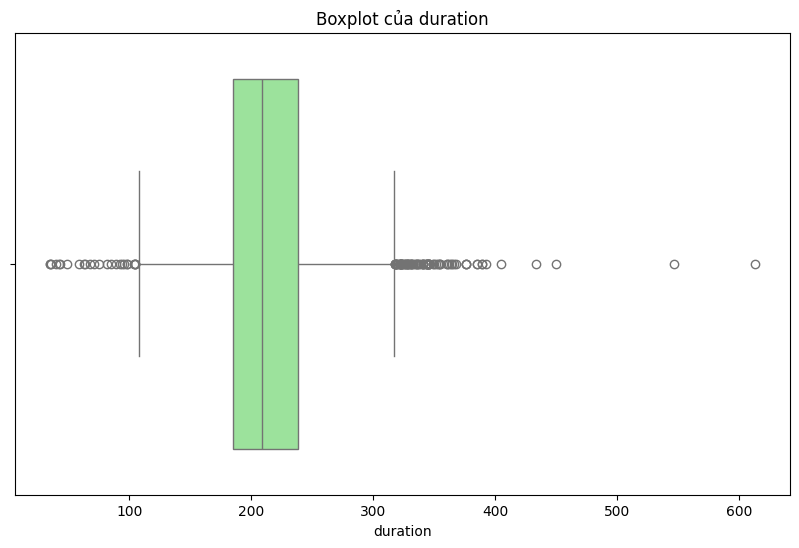

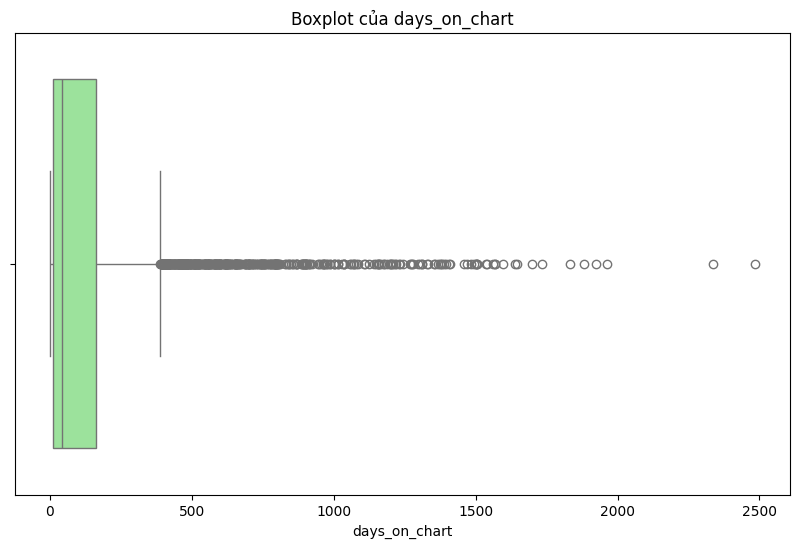

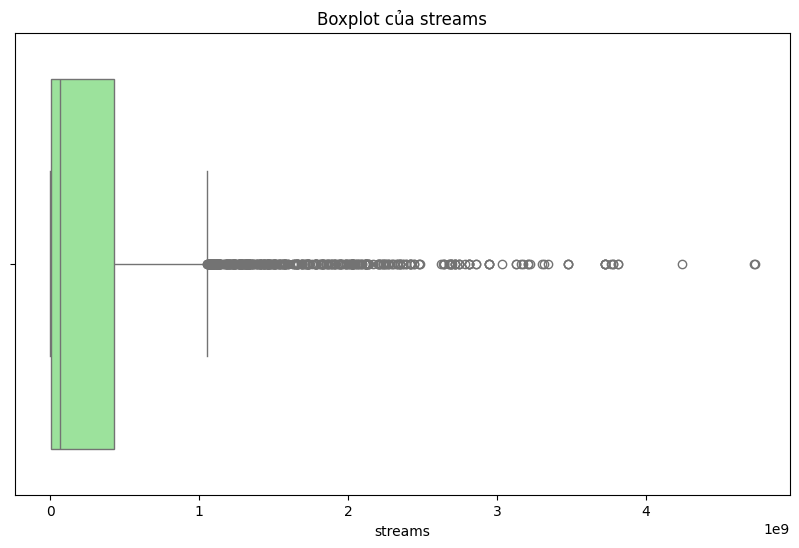

In [215]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=raw_df[col], color='lightgreen')
    plt.title(f'Boxplot của {col}')
    plt.show()

    # Tính toán IQR cho từng cột
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    if outliers.empty:
        print(f"Không có giá trị ngoại lai nào tìm được cho {col}")

Chúng ta có thể thấy dữ liệu dạng số có nhiều giá trị ngoại lai nhất là với `streams` và `days_on_chart`. Với các giá trị ngoại lai như trên ta có thể thấy được các giá trị ngoại lai này có thể ảnh hưởng đến phân bố. Tuy nhiên là chúng ta sẽ không xử lí các giá trị ngoại lai (loại bỏ nó hay scale lại) này ở đây mà sẽ phân tích kĩ hơn ở phần sau.

<a id="eda23"></a>
### **2.3. Phân bố của dữ liệu dạng phân loại**

Chúng ta đã kiểm tra dữ liệu thiếu ở phần trước nên phần này không phải bận tâm về nó nữa (missing_ratio = 0%). Đầu tiên chúng ta sẽ tính các giá trị như sau:
- Số lượng giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `num_values`
- Tỉ lệ các giá trị khác nhau trong mỗi trường, không tính giá trị thiếu: `value_ratios`

In [216]:
# Tìm các trường thuộc kiểu phân loại
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

cat_col_info = {}

# Tính toán
for col in categorical_cols:    
    num_values = raw_df[col].nunique(dropna = True)
    
    # Tính số các giá trị và tỉ lệ giá trị
    value_ratio = (np.round(raw_df[col].value_counts(normalize=True, ascending=False) * 100, 1)).to_dict()
    
    cat_col_info[col] = {
        "num_values": num_values,
        "value_ratio": value_ratio
    }
    
cat_col_info_df = pd.DataFrame(cat_col_info)
cat_col_info_df.T

,num_values,value_ratio
id,3487,"{'006LuHbY5Tt9dhbdSOnVq6': 0.0, '569B75eNRVDAB..."
track_name,2911,"{'Mượn Rượu Tỏ Tình': 0.1, 'Sunflower - Spider..."
artist_names,1558,"{'BTS': 3.8, 'Taylor Swift': 2.6, 'BLACKPINK':..."
source,572,"{'BIGHIT MUSIC': 7.3, 'Yin Yang Media': 6.2, '..."
peak_rank,199,"{1: 7.0, 2: 3.8, 5: 3.0, 3: 2.5, 4: 2.0, 7: 2...."
previous_rank,201,"{-1: 15.6, 180: 1.0, 177: 0.9, 168: 0.9, 182: ..."
rank,200,"{191: 1.6, 199: 1.5, 200: 1.5, 196: 1.5, 195: ..."


Có vẻ như có một số bất thường trong dữ liệu. Từ dataframe trên, chúng ta có thể có được một số thông tin về bộ dữ liệu như sau:
- Bất thường là có 3487 id khác nhau nhưng chỉ có 2911 tên bài hát.
- Có 1558 nghệ sĩ trong bộ dữ liệu với tần suất xuất hiện cao nhất là "BTS" với 3.8%.
- Có nhiều hãng đĩa (572 hãng), nhưng hãng đĩa sản xuất cho nhiều bài hát nhất thuộc về "BIGHIT MUSIC" với 7.3% cho `value_ratios`.
- Có quá nhiều thứ hạng trùng nhau trong `rank`. Lưu ý là chúng ta đã sử dụng tổng số lượt nghe `streams` thay vì lượt nghe hàng ngày ban đầu. Nên trường `rank` này không còn ý nghĩa nữa. Vậy nên chúng ta sẽ định nghĩa lại trường `rank` theo thứ hạng cuối cùng của mỗi bài hát, trức là theo `streams` hiện tại.

**Kiểm tra bất thường:**

Ta có thể đoán rằng có lẽ là do có các bài hát trùng tên với nhau dẫn đến việc có số các tên bài khác nhau khác với số các url. Để kiểm tra giả thuyết này, chúng ta sẽ kiểm tra xem có bài hát nào trùng tên với nhau không.

In [218]:
duplicate_names = raw_df[raw_df.duplicated('track_name', keep=False)]
print("Tổng số các bài hát trùng tên:", len(duplicate_names))

duplicate_num = raw_df.groupby('track_name').size().reset_index(name='count')
duplicate_num = duplicate_num[duplicate_num['count'] > 1]

print("Bài hát trùng tên và số lần trùng:")
print(duplicate_num)

Tổng số các bài hát trùng tên: 1061
Bài hát trùng tên và số lần trùng:
                           track_name  count
8                00:00 (Zero O’Clock)      2
18                             1 Phút      3
22                        10 Ngàn Năm      2
36                               2002      2
40                                24h      2
...                               ...    ...
2862            Để Mị Nói Cho Mà Nghe      2
2868                         Độ Tộc 2      2
2888                   đưa em về nhàa      2
2890  để tôi ôm em bằng giai điệu này      2
2903                               是你      2

[485 rows x 2 columns]


Kiểm tra lại số liệu xem có khớp không

In [220]:
print(len(duplicate_names) + 2911 - len(duplicate_num)) # 2911 là số bài hát khác nhau

3487


Vậy lí do là do có nhiều bài hát trùng tên (`num_values` của `track_name` bằng 3487). Nên không có gì bất thường ở đây. Tiếp theo chúng ta sẽ đi đến bất thường ở cột `streams`

**Xử lí bất thường:**

Chúng ta sẽ dùng trường `streams` để xác định thứ hạng cuối cùng của mỗi bài hát. Thông qua việc giá trị của `rank` sẽ theo thứ tự tăng dần theo giá trị của `streams`. Vậy nên chúng ta sẽ sắp xếp lại dữ liệu theo thứ tự giảm dần của `streams` và lấy giá trị cuối cùng của `rank` của mỗi bài hát. Vậy là chúng ta đã xử lí xong bất thường ở trường `rank`.

In [231]:
raw_df = raw_df.sort_values(by='streams', ascending=False).reset_index(drop=True)
raw_df['rank'] = raw_df['streams'].rank(method='first', ascending=False).astype('int64').astype('object')
raw_df.head()

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
0,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,"Idina Menzel, AURORA",Walt Disney Records,2019-11-29,202,50,145,23,1,4727746591
1,3AzjcOeAmA57TIOr9zF1ZW,Physical,Dua Lipa,Warner Records,2020-03-20,200,15,149,105,2,4726263786
2,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",Atlantic Records UK,2017-03-03,234,14,-1,86,3,4238338469
3,42zePe03Iq8tvFcJAIKkp8,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",RCA/Legacy,2019-05-17,182,59,59,2,4,3812743107
4,34ODRRWSsRbiB6sGI9R9Te,Badadu,MONSTAR,ST.319 Entertainment,2018-11-08,182,45,179,40,5,3811491910


Vậy là chúng đã xử lí các bất thường và cũng như là khám phá và tiền xử lí dữ liệu xong. Bộ dữ liệu mới sẽ được lưu vào file csv để sử dụng ở phần tiếp theo.

In [ ]:
raw_df.to_csv('../data/cleaned_data.csv', index=False, encoding='utf-8')
raw_df.sample(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
1799,5kRTXjVcdAHNCCbiUtJZTR,Tình Đắng Như Ly Cà Phê,"Ngơ, NÂN",12 trái lê,2019-09-12,163,74,103,183,1800,52985474
114,6WbADFqMvR8N5u0BvtsWQE,Without You (feat. Sandro Cavazza),"Avicii, Sandro Cavazza",Universal Music AB,2018-04-27,231,1,109,36,115,2064219143
381,1Axzkl935WrIsBwDqk90yQ,Đưa Nhau Đi Trốn - Chill Version,"Đen, Linh Cáo",Đen,2019-10-04,168,69,125,507,382,1125552324
2030,1nwdfbj4UyRMpa9L98a4Yi,Blue Side,j-hope,BIGHIT MUSIC,2021-03-02,199,7,190,9,2031,26746964
3411,42rme4MN6ki6mXgl4yaZtV,Tầng Thượng 102,Cá Hồi Hoang,Luke Record,2020-09-15,141,183,-1,9,3412,454534


<a id="analysis"></a>

# **V. Phân tích dữ liệu và trực quan hóa**

In [2]:
df = pd.read_csv('../data/cleaned_data.csv', encoding='utf-8')
df.head(5)

,id,track_name,artist_names,source,release_date,duration,peak_rank,previous_rank,days_on_chart,rank,streams
0,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,"Idina Menzel, AURORA",Walt Disney Records,2019-11-29,202,50,145,23,1,4727746591
1,3AzjcOeAmA57TIOr9zF1ZW,Physical,Dua Lipa,Warner Records,2020-03-20,200,15,149,105,2,4726263786
2,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",Atlantic Records UK,2017-03-03,234,14,-1,86,3,4238338469
3,42zePe03Iq8tvFcJAIKkp8,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",RCA/Legacy,2019-05-17,182,59,59,2,4,3812743107
4,34ODRRWSsRbiB6sGI9R9Te,Badadu,MONSTAR,ST.319 Entertainment,2018-11-08,182,45,179,40,5,3811491910


Mục tiêu phân tích của nhóm như đã nêu từ đầu là xu hướng thị hiếu âm nhạc của người nghe ở thị trường Việt Nam. Để có thể có cái nhìn đúng về thị trường âm nhạc trực tuyến ở Việt Nam hiện nay, chúng ta phải biết được mối quan hệ giữa các yếu tố âm nhạc dẫn đến sự thịnh hành của các bài hát, cũng như định hình xem sẽ phân tích các vấn đề gì. Vì vậy, trước tiên hết chúng ta sẽ cùng xem qua mối quan hệ giữa các trường có kiểu dữ liệu số với nhau, để có cái nhìn tổng quan nhất là về các yếu tố thời lượng - `duration`, thứ hạng - `rank` và lượt nghe - `streams`.

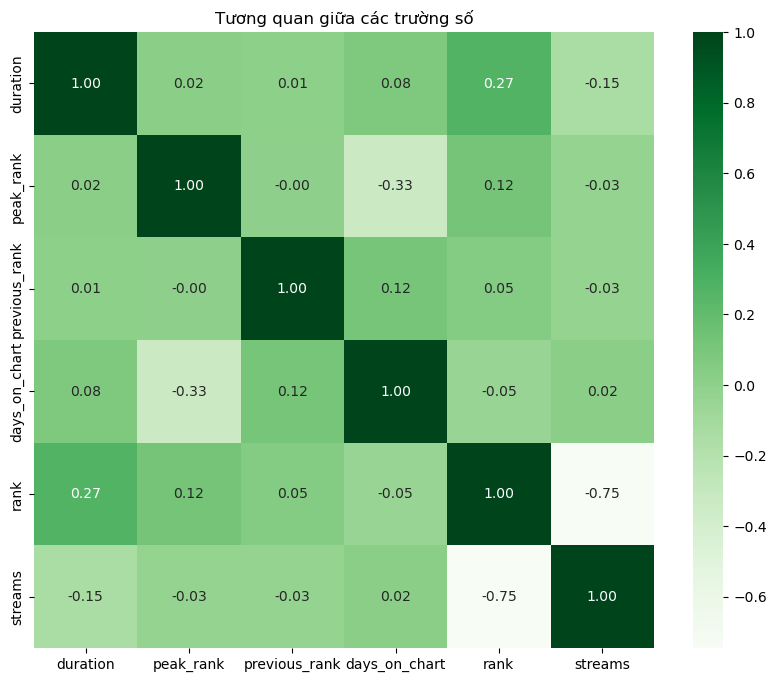

In [3]:
num_cols = df.select_dtypes(include=np.number).columns

# Tính ma trận tương quan
corr_matrix = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Tương quan giữa các trường số')
plt.savefig('../images/heatmap.svg', format='svg')
plt.show()

Chúng ta có thể thấy không có gì bất thường. Heatmap cho thấy thứ hạng - `rank` và lượt nghe - `streams` có tương quan âm mạnh với nhau (-0.75), tức là khi lượt nghe tăng thì thứ hạng giảm, tương ứng với việc bài hát đó được nghe nhiều hơn thì sẽ đứng cao hơn trên bảng xếp hạng. Còn thời lượng - `duration` thì có tương quan âm nhẹ với `streams` (-0.15) và tương quan dương nhẹ với `rank` (0.27), tức là thời lượng bài hát không ảnh hưởng nhiều đến lượt nghe và thứ hạng của bài hát. Tuy nhiên điều này sẽ cần xem xét thêm ở phần vấn đề phía sau.

Bên cạnh đó, chúng ta cũng thấy rằng, các trường `peak_rank`, `previous_rank` và `days_on_chart` không có tương quan nhiều với các trường còn lại, `peak_rank` và `previous_rank` hiện nay đã không có giá trị gì vì `rank` đã được xử lí lại theo `streams`. Nên chúng ta sẽ bỏ hai trường này.

In [3]:
df.drop(columns=['peak_rank', 'previous_rank'], inplace=True)
df.head()

,id,track_name,artist_names,source,release_date,duration,days_on_chart,rank,streams
0,3Z0oQ8r78OUaHvGPiDBR3W,Into the Unknown,"Idina Menzel, AURORA",Walt Disney Records,2019-11-29,202,23,1,4727746591
1,3AzjcOeAmA57TIOr9zF1ZW,Physical,Dua Lipa,Warner Records,2020-03-20,200,105,2,4726263786
2,5CLGzJsGqhCEECcpnFQA8x,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",Atlantic Records UK,2017-03-03,234,86,3,4238338469
3,42zePe03Iq8tvFcJAIKkp8,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",RCA/Legacy,2019-05-17,182,2,4,3812743107
4,34ODRRWSsRbiB6sGI9R9Te,Badadu,MONSTAR,ST.319 Entertainment,2018-11-08,182,40,5,3811491910


Đã xử lí xong dữ liệu, đến với vấn đề đầu tiên chúng ta sẽ xem xét liệu đâu là các thể loại nhạc phổ biến nhất ở Việt Nam bằng cách xem xét số lượng bài hát của từng thể loại nhạc, để trả lời cho câu hỏi:

<a id="a1"></a>
## **1. Mức độ ảnh hưởng của thể loại âm nhạc đến sự thịnh hành của bài hát**

<a id="a11"></a>
### **1.1. Các thể loại nhạc nào thịnh hành nhất ở Việt Nam?**
Để có thể xác định điều này, chúng ta cần thu thập dữ liệu về thể loại của mỗi bài hát trong bộ dữ liệu. Sau khi có được danh sách các thể loại nhạc, chúng ta có thể dễ dàng phân tích để xem xu hướng âm nhạc hiện tại tại Việt Nam nghiêng về thể loại nào.

Dữ liệu sẽ được thu thập từ `www.last.fm` thông qua phương pháp **web scraping**, một trang web phổ biến về âm nhạc, cho phép người dùng truy cập vào thông tin về các bài hát và nghệ sĩ. Trang web này không chỉ cung cấp thông tin về tên bài hát và nghệ sĩ mà còn cho phép lấy các tag liên quan đến nguồn gốc, thể loại của bài hát. Các tag này bao gồm những thể loại âm nhạc phổ biến như **pop**, **rock**, **hip-hop**, **jazz**, v.v... Tuy nhiên, chúng ta sẽ chỉ tập trung vào việc xác định nguồn gốc của bài hát, tức là bài hát đến từ đất nước hoặc khu vực nào.

In [9]:
# Danh sách các thể loại nhạc
genre_tags = [
    "v-pop", "k-pop", "c-pop"
]

# Hàm lấy thể loại mỗi bài hát
def get_genre(artist_name, track_name):
    # Xử lý khoảng trắng
    artist_name_encoded = artist_name.replace(" ", "%20")
    track_name_encoded = track_name.replace(" ", "%20")
    
    # URL của bài hát
    url = f"https://www.last.fm/music/{artist_name_encoded}/_/{track_name_encoded}"
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse HTML bằng BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Tìm tất cả các thẻ <a> có href chứa '/tag/'
        tag_links = soup.find_all('a', href=True)

        # Danh sách để lưu tất cả các tag
        tags = [tag.get_text().strip() for tag in tag_links if '/tag/' in tag['href']]
        
        # Kiểm tra các tags có thuộc genre_tags hay không và trả về kết quả
        if any(tag.lower() in ["vpop", "vietnam", "vietnamese"] for tag in tags):
            return "Nhạc Việt"
        elif "k-pop" in [tag.lower() for tag in tags]:
            return "Nhạc Hàn"
        elif "c-pop" in [tag.lower() for tag in tags]:
            return "Nhạc Trung"

        # Nếu không có tag hợp lệ, kiểm tra xem có bất kỳ tag nào không thuộc genre_tags
        elif tags:
            return "Nhạc nước ngoài"
        else:
            return "Khác"
    else:
        return "Khác"

# Tạo bản sao của df gốc
genre_df = df.copy()

# Áp dụng hàm get_genre lên từng dòng của genre_df 
genre_df['genre'] = genre_df.apply(lambda row: get_genre(row['artist_names'], row['track_name']), axis=1)

Các thể loại nhạc bao gồm: **Nhạc Việt**, **Nhạc Hàn**, **Nhạc Trung** và **Nhạc nước ngoài**. Ngoài ra, còn có **Khác** biểu thị rằng bài hát đó không xác định được thể loại cụ thể, hoặc không có dữ liệu để thu thập.

Sau khi thành công lấy được bộ dữ liệu gồm danh sách các bài hát kèm thể loại nhạc, bộ dữ liệu này sẽ được lưu vào file `cleaned_data_genre.csv` - là file chỉ sử dụng cho những phân tích liên quan đến thể loại nhạc.

In [10]:
genre_df.to_csv('../data/cleaned_data_genre.csv', index=False, encoding='utf-8')
genre_df[['artist_names', 'track_name', 'genre']]

,artist_names,track_name,genre
0,"Idina Menzel, AURORA",Into the Unknown,Nhạc nước ngoài
1,Dua Lipa,Physical,Nhạc nước ngoài
2,"Rudimental, Jess Glynne, Macklemore, Dan Caplen","These Days (feat. Jess Glynne, Macklemore & Da...",Khác
3,"Miley Cyrus, Ghostface Killah",D.R.E.A.M. (feat. Ghostface Killah),Khác
4,MONSTAR,Badadu,Nhạc nước ngoài
...,...,...,...
3482,Dean Lewis,Be Alright,Nhạc nước ngoài
3483,Billie Eilish,bellyache,Nhạc nước ngoài
3484,Khánh Ly,Diễm Xưa,Nhạc Việt
3485,Halsey,Without Me,Nhạc nước ngoài


Tiếp theo, chúng ta cùng xem xét số lượng bài hát của từng thể loại nhạc để nhận diện được xu hướng âm nhạc phổ biến ở Việt Nam hiện nay.

In [4]:
# Đọc dữ liệu từ tệp CSV
genre_df = pd.read_csv('../data/cleaned_data_genre.csv', encoding='utf-8')

# Đếm số lượng bài hát của mỗi thể loại
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['Thể loại', 'Số lượng bài hát']
genre_counts

,Thể loại,Số lượng bài hát
0,Khác,1210
1,Nhạc nước ngoài,1117
2,Nhạc Việt,620
3,Nhạc Hàn,538
4,Nhạc Trung,2


Có vẻ như có một số lượng lớn bài hát không được phân loại cụ thể, nhưng thay vì bỏ qua, chúng ta sẽ trực quan hóa chúng cùng với các thể loại khác bằng biểu đồ để so sánh tổng quan kích thước của từng thể loại trong toàn bộ tập dữ liệu.

In [5]:
# Vẽ biểu đồ
fig = px.treemap(genre_counts, 
                 path=['Thể loại'], 
                 values='Số lượng bài hát',
                 title="Các thể loại nhạc thịnh hành nhất ở Việt Nam")
# fig.write_image('../images/treemap_genre.svg', format='svg', engine='kaleido')
fig.show()

Như đã thấy trong biểu đồ Treemap, các thể loại nhạc thịnh hành ở Việt Nam hiện nay bao gồm **Nhạc nước ngoài**, **Nhạc Việt**, **Nhạc Hàn**, và **Khác**. Trong đó, **Khác** chiếm diện tích lớn nhất, cho thấy có một lượng lớn bài hát không được phân loại vào thể loại cụ thể nhưng vẫn thu hút nhiều người ủng hộ. **Nhạc nước ngoài** chiếm diện tích lớn thứ hai, cho thấy sự ưa chuộng mạnh mẽ của người nghe đối với âm nhạc quốc tế. Tiếp theo là **Nhạc Việt**, thể loại này cũng có sự hiện diện rõ rệt trong thị trường âm nhạc Việt Nam, mặc dù diện tích nhỏ hơn. **Nhạc Hàn** có mặt trong danh sách nhưng chiếm diện tích nhỏ hơn so với các thể loại khác, cho thấy sự yêu thích đối với âm nhạc Hàn Quốc nhưng không chiếm ưu thế như các thể loại khác.

Mỗi thể loại có số lượng bài hát riêng biệt, cho thấy sự đa dạng trong sở thích âm nhạc của người nghe trực tuyến. Vậy liệu các thể loại này thịnh hành hơn do có nhiều bài hát trên các nền tảng trực tuyến hơn, từ đó ảnh hưởng đến quyết định chọn nhạc của người nghe, hay là do thị hiếu chung của người nghe nhạc trực tuyến tại Việt Nam? Đây là một vấn đề cần được nghiên cứu thêm.

<a id="a12"></a>
### **1.2. Sự hiện diện của các thể loại âm nhạc trên thị trường âm nhạc Việt Nam**
Để trả lời cho câu hỏi này, chúng ta vẫn sẽ xem xét số lượng bài hát của từng thể loại nhạc trong `genre_df`. Tuy nhiên, nhóm bài hát **"Khác"** không phản ánh rõ ràng sự hiện diện của các thể loại cụ thể trong thị trường âm nhạc, nên sẽ được lược bỏ để tập trung vào sự phân bổ của các thể loại âm nhạc chính.

In [6]:
# Lọc bỏ dòng có giá trị "Khác" trong cột 'genre'
genre_df = genre_df[genre_df['genre'] != 'Khác']

# Đếm số lượng bài hát của mỗi thể loại
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['Thể loại', 'Số lượng bài hát']
genre_counts

,Thể loại,Số lượng bài hát
0,Nhạc nước ngoài,1117
1,Nhạc Việt,620
2,Nhạc Hàn,538
3,Nhạc Trung,2


In [7]:
# Vẽ biểu đồ 
fig = px.bar(genre_counts,
             x='Thể loại', 
             y='Số lượng bài hát',
             title="Các thể loại nhạc hiện diện trên BXH ở Việt Nam",
             color='Số lượng bài hát',
             labels={'Số lượng bài hát': 'Số lượng bài hát'})
# fig.write_image('../images/bar_genre.svg', format='svg', engine='kaleido')
fig.show()

Như đã thấy trong biểu đồ trên, các thể loại âm nhạc hiện diện trong bảng xếp hạng thịnh hành ở Việt Nam có sự phân bổ rõ ràng. **Nhạc nước ngoài** chiếm tỷ lệ lớn nhất về số lượng bài hát, với hơn 1000 bài, cho thấy rằng âm nhạc quốc tế có sự hiện diện mạnh mẽ trong thị trường âm nhạc Việt Nam. Tiếp theo là **Nhạc Việt**, với khoảng 600 bài hát, thể hiện sự ưa chuộng lớn từ người nghe đối với âm nhạc trong nước. Các thể loại **Nhạc Hàn** và **Nhạc Trung** có số lượng bài hát ít hơn nhiều, nhưng vẫn có sự hiện diện trong bảng xếp hạng.

Điều này cho thấy, mặc dù **Nhạc nước ngoài** chiếm ưu thế về số lượng bài hát, **Nhạc Việt** vẫn duy trì một vị trí vững chắc trong thị trường âm nhạc Việt Nam. Sự xuất hiện của âm nhạc quốc tế, đặc biệt là **Nhạc Hàn**, cũng cho thấy một sự thay đổi trong thói quen nghe nhạc của người Việt, nơi âm nhạc quốc tế đang dần chiếm lĩnh thị trường.

Vậy trên thị trường âm nhạc Việt Nam, liệu **Nhạc Việt** hay **Nhạc nước ngoài** đang chiếm ưu thế hơn? Câu hỏi này có thể được trả lời qua các phân tích sâu hơn về xu hướng và sở thích của người nghe, cũng như các yếu tố tác động đến sự lựa chọn thể loại âm nhạc của họ.

<a id="a2"></a>
## **2. Nhạc Việt hay Nhạc Ngoại: Tổng quan thị trường nhạc Việt hiện nay?**
Để hiểu rõ hơn về sự phân bố của nhạc Việt và nhạc Ngoại trên bảng xếp hạng, chúng ta cần chia dữ liệu theo các khoảng rank khác nhau, từ đó phân tích tỷ lệ giữa hai thể loại nhạc trong từng nhóm. Các khoảng rank sẽ được phân chia như sau: **Top 1-500**, **Top 501-1000**, **Top 1001-1500**, và **Top 1501+**.

Bằng cách này, chúng ta có thể xác định được sự phân bố của các bài hát trong các nhóm rank khác nhau và tính toán tỷ lệ giữa nhạc Việt và nhạc Ngoại trong mỗi nhóm rank đó. Mục tiêu là tìm hiểu xem thị trường nhạc Việt hiện nay có đang chiếm ưu thế hay nhạc Ngoại vẫn giữ vị trí thống trị trên bảng xếp hạng.

In [8]:
# Chia dữ liệu theo rank vào các khoảng (1-500, 501-1000, 1001-1500, 1501-2000+)
bins = [0, 500, 1000, 1500, float('inf')]  
labels = ['Top 1-500', 'Top 501-1000', 'Top 1001-1500', 'Top 1501+']

# Gán khoảng rank cho mỗi bài hát
genre_df['Rank'] = pd.cut(genre_df['rank'], bins=bins, labels=labels, right=True)

# Phân loại Nhạc Việt và Nhạc Ngoại
genre_df['Thể loại'] = genre_df['genre'].apply(lambda x: 'Nhạc Việt' if x == 'Nhạc Việt' else 'Nhạc Ngoại')

# Tính tỷ lệ Nhạc Việt và Nhạc Ngoại cho mỗi nhóm
grouped = genre_df.groupby(['Rank', 'Thể loại'], observed=False).size().reset_index(name='Số lượng bài hát')
grouped

,Rank,Thể loại,Số lượng bài hát
0,Top 1-500,Nhạc Ngoại,328
1,Top 1-500,Nhạc Việt,71
2,Top 501-1000,Nhạc Ngoại,345
3,Top 501-1000,Nhạc Việt,47
4,Top 1001-1500,Nhạc Ngoại,353
5,Top 1001-1500,Nhạc Việt,42
6,Top 1501+,Nhạc Ngoại,631
7,Top 1501+,Nhạc Việt,460


Sau khi tính được số lượng bài hát thuộc Nhạc Việt và Nhạc Ngoại trong các nhóm rank khác nhau, ta sẽ trực quan hóa sự phân bố tỷ lệ này bằng biểu đồ donut. Mỗi vòng tròn trong biểu đồ sẽ đại diện cho một khoảng rank, và tỷ lệ giữa Nhạc Việt và Nhạc Ngoại sẽ được thể hiện dưới dạng các phần trong vòng tròn.

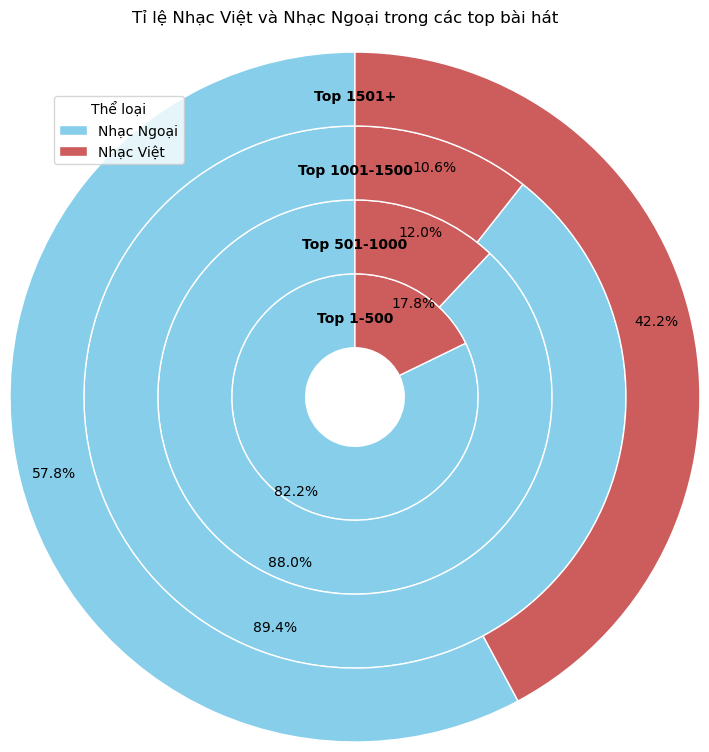

In [9]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['skyblue', 'indianred']  # Nhạc Ngoại: màu xanh, Nhạc Việt: màu đỏ

# Vẽ mỗi vòng donut chart cho từng khoảng Rank
radius = 0.5
for i, rank_range in enumerate(labels):
    data = grouped[grouped['Rank'] == rank_range]
    
    # Tính tỷ lệ Nhạc Ngoại và Nhạc Việt trong mỗi nhóm
    sizes = data['Số lượng bài hát']
    labels = data['Thể loại']
    
    # Vẽ biểu đồ donut cho mỗi khoảng Rank
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90, 
                                      colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'), 
                                      radius=radius, pctdistance=0.9)
    
    # Đặt tiêu đề cho từng vòng tròn
    ax.annotate(f'{rank_range}', xy=(0, 0), xytext=(0, radius - 0.15),
                ha='center', va='top', fontweight='bold')
    
    # Tăng bán kính cho vòng tròn tiếp theo
    radius += 0.3

ax.legend(labels=['Nhạc Ngoại', 'Nhạc Việt'], loc='upper left', title="Thể loại")
plt.suptitle('Tỉ lệ Nhạc Việt và Nhạc Ngoại trong các top bài hát')
plt.savefig('../images/donut_4_layers.svg', format='svg')
plt.show()

Nhìn vào biểu đồ donut trên, ta có thể rút ra một số nhận xét đáng chú ý về tỷ lệ phân bố giữa Nhạc Việt và Nhạc Ngoại trong các nhóm bài hát top:

- **Top 1-500:** Nhạc Ngoại chiếm đến **82.2%**, trong khi Nhạc Việt chỉ chiếm **17.8%**. Điều này cho thấy Nhạc Ngoại chiếm ưu thế rõ rệt trong nhóm bài hát này, đặc biệt là các bài hát có thứ hạng cao nhất.

- **Top 501-1000:** Tỷ lệ Nhạc Ngoại vẫn chiếm ưu thế với **88.0%**, so với Nhạc Việt chỉ có **12.0%**. Sự phân bố này tiếp tục thể hiện xu hướng Nhạc Ngoại chiếm ưu thế ở các vị trí cao trên bảng xếp hạng.

- **Top 1001-1500:** Sự phân chia giữa Nhạc Việt và Nhạc Ngoại có sự thay đổi nhẹ, với Nhạc Ngoại chiếm **89.4%** và Nhạc Việt chiếm **10.6%**. Tuy nhiên, Nhạc Ngoại vẫn chiếm tỷ lệ áp đảo trong nhóm này.

- **Top 1501+:** Đây là nhóm có tỷ lệ phân chia thấp nhất giữa Nhạc Ngoại và Nhạc Việt. Trong khi Nhạc Ngoại chiếm **57.8%**, tỷ lệ này của Nhạc Việt lại là **42.2%**, cho thấy rằng trong nhóm bài hát có thứ hạng thấp hơn, Nhạc Việt bắt đầu có sự gia tăng đáng kể so với các nhóm trước.

Tóm lại, biểu đồ này cho thấy sự phân chia rõ rệt giữa Nhạc Việt và Nhạc Ngoại theo các nhóm rank. Nhạc Ngoại chiếm ưu thế lớn trong các top cao, nhưng ở các top thấp hơn, đặc biệt là nhóm **Top 1501+**, tỷ lệ Nhạc Việt tăng lên. Điều này phản ánh sự phát triển mạnh mẽ của thị trường Nhạc Việt trong những năm gần đây, mặc dù Nhạc Ngoại vẫn chiếm lĩnh các vị trí cao trên bảng xếp hạng.

Sau khi đã có cái nhìn nhất định về thị trường âm nhạc Việt Nam, chúng ta sẽ đi sâu hơn về phần cảm nhận của người nghe để biết thêm những yếu tố nào ảnh hưởng đến sự chọn lựa của họ. Câu hỏi đặt ra là những nguyên nhân nào cấu thành sự thành công của một bài hát mà thành công ở đây là được nhiều người đón nhận trên thước đo bảng xếp hạng? Để trả lời cho câu hỏi này, chúng ta sẽ xem xét các câu hỏi sau:

<a id="a3"></a>
## **3. Thời lượng như thế nào là tối ưu hiện tại?**

Thời lượng cũng là một thành phần được hiển thị khi người nghe chọn nghe nhạc trực tuyến. Vậy liệu thời lượng của bài hát có ảnh hưởng đến sự thành công của bài hát không và đâu là thời lượng tối ưu của một bài hát thành công? Tối ưu ở đây là khi bài hát đó đáp ứng được nhu cầu thị hiếu của người nghe và trở nên nổi tiếng. Để trả lời cho câu hỏi này, đầu tiên chúng ta sẽ xem xét thời lượng trung bình của các bài hát trên bảng xếp hạng là bao nhiêu.

Thời lượng trung bình của các bài hát trên bảng xếp hạng là: 214.18 giây


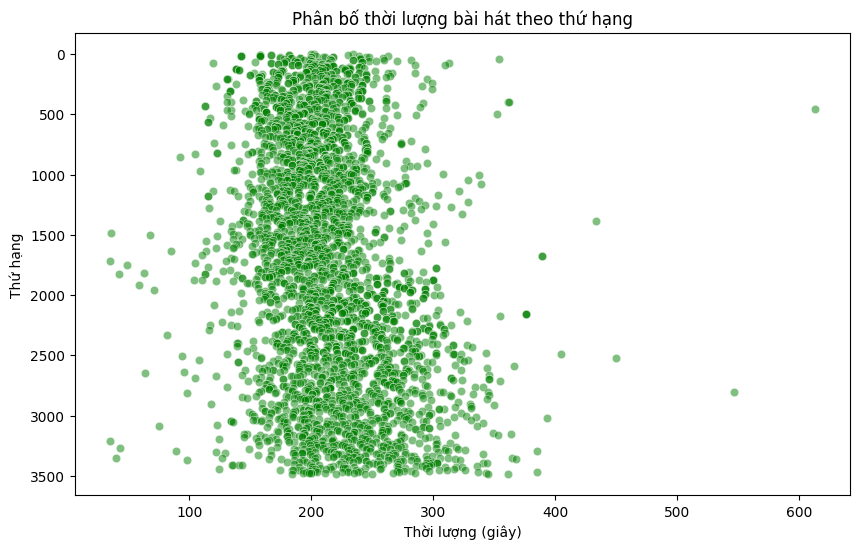

In [4]:
avg_dur = df['duration'].mean()
print(f"Thời lượng trung bình của các bài hát trên bảng xếp hạng là: {avg_dur:.2f} giây")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rank', data=df, alpha=0.5, color='green')
plt.title('Phân bố thời lượng bài hát theo thứ hạng')
plt.xlabel('Thời lượng (giây)')
plt.ylabel('Thứ hạng')
plt.gca().invert_yaxis() 
plt.savefig('../images/scatterplot.svg', format='svg')
plt.show()

Vậy thời lượng trung bình của các bài hát trên bảng xếp hạng là 214.18 giây, tương đương với 3 phút 34 giây. Một thời lượng khá lý tưởng cho một bài hát. Đồng thời dựa vào biểu đồ, ta thấy thời lượng của bài hát tập trung nhiều ở khoảng 180 - 260 giây.

Câu hỏi đặt ra là đâu là thời khoảng thời lượng thời lượng tối ưu cho một bài hát hiện nay? Để trả lời cho câu hỏi này, chúng ta sẽ xem xét xem các bài hát có thứ hạng cao nhất (top 20) gần nhất có thời lượng như thế nào?

In [5]:
top_20_tracks = df[df['rank'] <= 20]
top_20_tracks[['track_name', 'duration', 'rank', 'streams']]

,track_name,duration,rank,streams
0,Into the Unknown,202,1,4727746591
1,Physical,200,2,4726263786
2,"These Days (feat. Jess Glynne, Macklemore & Da...",234,3,4238338469
3,D.R.E.A.M. (feat. Ghostface Killah),182,4,3812743107
4,Badadu,182,5,3811491910
5,As It Was,167,6,3774211059
6,As It Was,167,7,3774211059
7,Starboy,230,8,3764936894
8,Hết Thương Cạn Nhớ,158,9,3721945430
9,Liar,158,10,3721945430


Một bất thường ở đây là có một sự trùng lặp giữa top 15 và top 16 cùng một lượt stream và cùng một bài hát. Nhưng chúng ta đã xóa `uri` trùng, nên đây là một bài hát nhưng khác `uri` vì tên `track_name`, nghệ sĩ `artist_names` của bài hát tương tự. Vậy nên chúng ta sẽ xóa một trong hai của các bài hát có cùng `track_name`, `artist_names` và `streams` để tránh sự trùng lặp này.

In [6]:
# Xóa bài hát ở top 16 tức index 15
df.drop_duplicates(subset=['track_name', 'artist_names', 'streams'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Định lại thứ hạng cho các bài hát
df = df.sort_values(by='streams', ascending=False).reset_index(drop=True)
df['rank'] = df.index + 1

# Lọc và hiển thị các bài hát có rank <= 20
top_20_tracks = df[df['rank'] <= 20]
top_20_tracks[['track_name', 'duration', 'rank', 'streams']]

,track_name,duration,rank,streams
0,Into the Unknown,202,1,4727746591
1,Physical,200,2,4726263786
2,"These Days (feat. Jess Glynne, Macklemore & Da...",234,3,4238338469
3,D.R.E.A.M. (feat. Ghostface Killah),182,4,3812743107
4,Badadu,182,5,3811491910
5,As It Was,167,6,3774211059
6,Starboy,230,7,3764936894
7,Hết Thương Cạn Nhớ,158,8,3721945430
8,Liar,158,9,3721945430
9,"Ngày Chưa Giông Bão (Theme Song From ""Người Bấ...",158,10,3720760877


In [ ]:
fig = px.line(
    top_20_tracks, x='rank', y='duration', 
    title='Xu hướng giữa thời lượng và thứ hạng của top 20 bài hát', 
    labels={'duration': 'Thời lượng (giây)', 'rank': 'Thứ hạng'},
    markers=True
)
fig.update_traces(line=dict(color='green'), marker=dict(color='pink', size=8))

fig.add_shape(
    type='line',
    x0=top_20_tracks['rank'].min(),
    x1=top_20_tracks['rank'].max(),
    y0=avg_dur,
    y1=avg_dur,
    line=dict(color='blue', dash='dash'),
    name='avg_duration'
)

fig.write_image('../images/line_chart_top20.svg', format='svg', engine='kaleido')

fig.show()

Chúng ta có thể thấy trong top 20 bài hát thịnh hành nhất hiện nay (thịnh hành ở đây là có lượt nghe cao nhất), thời lượng có sự biến động lớn, không đồng đều nhau về thời lượng, trừ từ top 9 đến top 12 có cùng một thời lượng là 158 giây dù rằng là các bài khác nhau. Điều đáng chú ý là, chỉ có 4 trên 20 bài hát có thời lượng trên thời lượng trung bình (tức 214.18 giây), còn lại đều dưới thời lượng trung bình này. Thậm chí từ top 9 đến top 14 đều có thời lượng dưới 160 giây (tức 2 phút 40 giây), nghĩa là rất ngắn, cách xa so với thời lượng trung bình tận gần 1 phút. Chưa kể đến hai bài hát dẫn đầu top 1, top 2 cũng có thời lượng ngắn hơn so với thời lượng trung bình (202 giây và 200 giây). 

Chúng ta lấy top 20, tức là chúng ta đã lấy những bài hát có độ nổi tiếng rất mạnh mẽ đến công chúng hiện nay, mà rõ ràng chúng ta thấy rằng là thời lượng đại bộ phận bài hát đều không dài hơn trung bình, vậy liệu công chúng thích các bài nhạc có thời lượng không dài và xu hướng sản xuất nhạc hiện tại là nhạc càng ngày càng ngắn chăng? Để có thể đưa ra một nhận định đúng đắn, nhóm đặt ra câu hỏi là liệu thời lượng của một bài hát hiện nay có càng ngày càng ngắn?

In [9]:
# Chắc chắn rằng cột release_date là datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Lấy trung bình thời lượng bài hát theo thời gian
avg_duration_overtime = df.groupby(df['release_date'].dt.to_period('M'))['duration'].mean().reset_index()
avg_duration_overtime['release_date'] = avg_duration_overtime['release_date'].dt.to_timestamp()

fig = px.line(
    avg_duration_overtime,
    x='release_date',
    y='duration',
    title='Xu hướng thời lượng bài hát theo thời gian',
    labels={'release_date': 'Thời gian ra mắt', 'duration': 'Thời lượng (giây)'},
)

fig.update_traces(line=dict(color='lightgreen'))

fig.write_image('../images/line_chart_overtime.svg', format='svg', engine='kaleido')

fig.show()

Ngoại trừ một vài ngoại lệ là ra mắt vào khoảng thời gian năm 1970 về trước có khoảng thời lượng khá ngắn là xấp xỉ 150 giây đổ xuống (tức 2 phút 30 giây), thì các bài hát trong tầm từ đó đến năm 2014 có trung bình thời lượng phân bố trong khoảng từ 180 giây đến hơn 350 giây (tức từ 3 phút đến hơn 5 phút). Tuy nhiên, từ năm 2015 đến nay, thời lượng của các bài hát giảm xuống, hầu như trung bình đều không vượt trên 250 giây (4 phút) và tập trung phân bố trong khoảng từ 180 giây đến 275 giây (tức từ 3 phút đến 4 phút 35 giây).

Dựa vào biểu đồ xu hướng thời lượng của bài hát qua các năm cho thấy xu hướng sản xuất nhạc của thời gian gần đây là những bài nhạc có thời gian không quá dài cũng không quá ngắn, một độ dài vừa phải. Nhìn chung, "thời lượng vàng" của hiện tại là các bài hát không quá dài tầm từ 3 đến 4 phút. Tuy nhiên, thời lượng của các bài hát vẫn khá đa dạng, không phải bài hát ngắn thì mới xuất hiện trong bảng xếp hạng, tương tự với bài hát dài cũng vậy. Và hiển nhiên, người nghe cũng sẵn sàng nghe các bài hát khá ngắn từ 2 phút đến hơn 3 phút và thậm chí là những bài hát này còn trở nên thịnh hành nhất hiện nay (như đã thấy ở biểu đồ Xu hướng giữa thời lượng và thứ hạng trong top 20 bài hát thịnh hành). Điều đó chứng tỏ có sự đa dạng trong phong cách sản xuất nhạc và người nghe cũng có sở thích đa dạng trong việc lựa chọn âm nhạc với thời lượng khác nhau. Nhưng chúng ta có thể thấy là các bài hát ngắn tạm thời đang khá được lòng công chúng hiện nay.

Tuy nhiên là có vẻ như ngoài thời lượng của bài hát, còn có một yếu tố khác cũng ảnh hưởng đến sự thành công của một bài hát. Đây không hẳn là một yếu tố hoàn toàn quyết định thị hiếu của người nghe. Nhưng nó cũng giúp chúng ta thấy được một phần nào đó về xu thế âm nhạc hiện nay và hiển nhiên là chúng ta phải phân tích thêm. Nên tiếp theo sau đây chúng ta sẽ cùng tìm hiểu tiếp về vấn đề tiếp theo.

Chúng ta không thể có một bài hát mà không có nghệ sĩ đằng sau nó. Có thể nói sự nghệ sĩ luôn đi kèm với sự xuất hiện và độ thành công của bài hát. Nhóm giả thiết rằng nghệ sĩ cũng ảnh hưởng đến xu thế thưởng thức âm nhạc của người nghe. Vậy nên chúng ta sẽ đi sâu vào vấn đề này sau đây:

<a id="a4"></a>
## **4. Những nghệ sĩ nào đang thống trị thị trường âm nhạc Việt Nam?**

Trước tiên hết, chúng ta sẽ cùng xem xem, các bài hát có số lượt nghe cao nhất hiện nay là của những nghệ sĩ nào (lấy top 30)?

In [9]:
top_30_tracks = df[df['rank'] <= 30][['rank', 'track_name', 'artist_names', 'streams']]
top_30_tracks

,rank,track_name,artist_names,streams
0,1,Into the Unknown,"Idina Menzel, AURORA",4727746591
1,2,Physical,Dua Lipa,4726263786
2,3,"These Days (feat. Jess Glynne, Macklemore & Da...","Rudimental, Jess Glynne, Macklemore, Dan Caplen",4238338469
3,4,D.R.E.A.M. (feat. Ghostface Killah),"Miley Cyrus, Ghostface Killah",3812743107
4,5,Badadu,MONSTAR,3811491910
5,6,As It Was,Harry Styles,3774211059
6,7,As It Was,Harry Styles,3774211059
7,8,Starboy,"The Weeknd, Daft Punk",3764936894
8,9,Hết Thương Cạn Nhớ,Đức Phúc,3721945430
9,10,Liar,Camila Cabello,3721945430


Đây chính là thứ hạng top 30 trên tổng số lượt nghe từ 2018 đến nay. Có vẻ có khá nhiều nghệ sĩ nước ngoài ở đây và rất ít nghệ sĩ Việt Nam (6 nghệ sĩ): Đức Phúc, Bùi Lan Hương, DaLAB, Tiên Tiên, Thái Đinh, Mỹ Tâm. Để có thể biết được rõ ràng hơn về các nghệ sĩ đang có số lượng lượt nghe nhạc của mình cao nhất từ năm 2018 đến nay ở thị trường âm nhạc Việt Nam, cũng như là số lượng bài hát của họ và thứ hạng của chúng trên bảng xếp hạng top 30, chúng ta sẽ xem xét biểu đồ dưới đây:

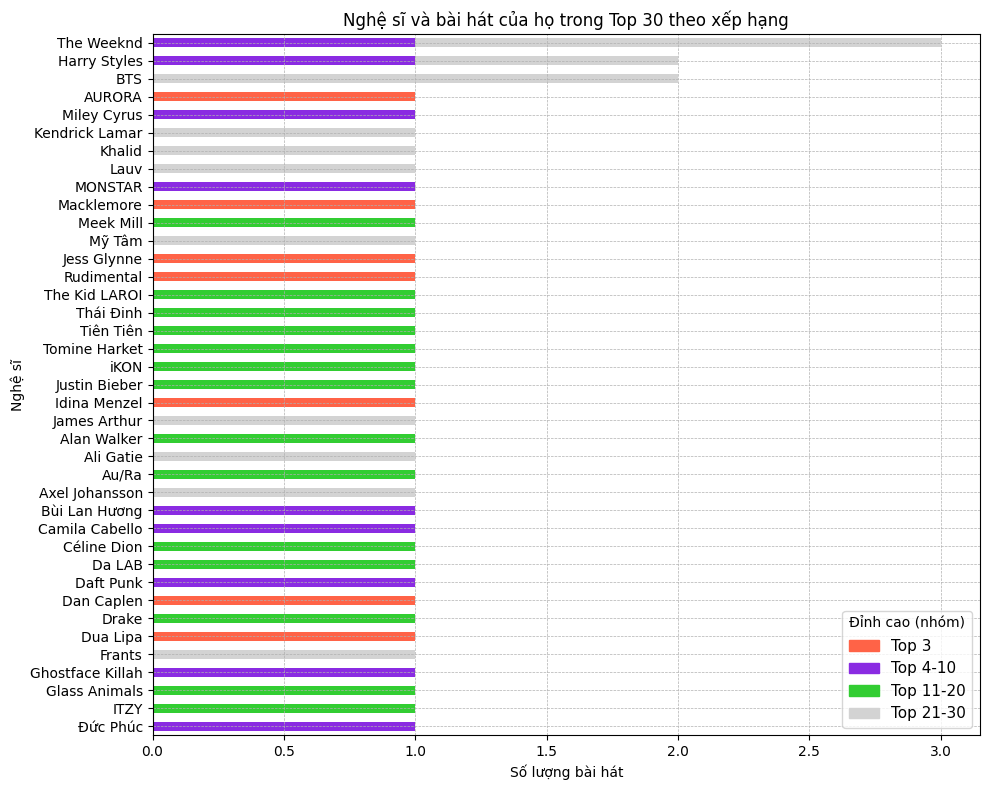

In [80]:
# Tách tên nghệ sĩ
df_exploded = top_30_tracks.assign(artist_names=df['artist_names'].str.split(',')).explode('artist_names')

# Đảm bảo rằng không có khoảng trắng thừa ở đầu hoặc cuối tên nghệ sĩ
df_exploded['artist_names'] = df_exploded['artist_names'].str.strip()
# Nhóm theo nghệ sĩ và xếp hạng, sau đó đếm số lượng bài hát
rank_counts = df_exploded.groupby(['artist_names', 'rank']).size().unstack(fill_value=0)

# Sắp xếp các nghệ sĩ theo tổng số bài
rank_counts['Total'] = rank_counts.sum(axis=1)
rank_counts = rank_counts.sort_values(by='Total', ascending=False)
rank_counts = rank_counts[::-1]

rank_colors = {
    'Top3': '#FF6347',  
    'Top4-10': '#8A2BE2', 
    'Top11-20': '#32CD32', 
    'Top21-30': '#D3D3D3' 
}

# Ánh xạ màu cho từng xếp hạng
color_mapping = []
for rank in rank_counts.columns[:-1]:  # Loại trừ cột 'Total'
    if int(rank) <= 3:
        color_mapping.append(rank_colors['Top3'])
    elif 4 <= int(rank) <= 10:
        color_mapping.append(rank_colors['Top4-10'])
    elif 11 <= int(rank) <= 20:
        color_mapping.append(rank_colors['Top11-20'])
    else:
        color_mapping.append(rank_colors['Top21-30'])

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))
bars = rank_counts.drop(columns='Total').plot(kind='barh', stacked=True, ax=ax, color=color_mapping)

ax.set_xlabel('Số lượng bài hát')
ax.set_ylabel('Nghệ sĩ')
ax.set_title('Nghệ sĩ và bài hát của họ trong Top 30 theo xếp hạng')

legend_handles = [
    mpatches.Patch(color=rank_colors['Top3'], label='Top 3'),
    mpatches.Patch(color=rank_colors['Top4-10'], label='Top 4-10'),
    mpatches.Patch(color=rank_colors['Top11-20'], label='Top 11-20'),
    mpatches.Patch(color=rank_colors['Top21-30'], label='Top 21-30')
]

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(handles=legend_handles, title='Đỉnh cao (nhóm)', loc='lower right', bbox_to_anchor=(1, 0), fontsize=11)

plt.tight_layout()
plt.show()

Nhìn chung, đại đa số các nghệ sĩ chỉ có 1 bài hát lọt vào top 30, tuy nhiên có 3 ngoại lệ là: The Weeknd với 3 bài hát, Harry Styles và BTS với 2 bài hát.

Có một sự bất ngờ được thể hiện trên biểu đồ là, dường như các nghệ sĩ nước ngoài đang chiếm ưu thế về độ nhận diện bài hát với gu của người nghe Việt Nam với sự xuất hiện 15/20 nghệ sĩ nắm các bài hát thuộc top 30 bảng xếp hạng lượt nghe trên Spotify và nắm gần như hoàn toàn các bài hát từ top 1 đến top 10, chỉ có Đức Phúc và Bùi Lan Hương là nghệ sĩ người Việt góp mặt vào. Việc thị trường nhạc Việt được phân chia như thế nào bởi nhạc Việt và nhạc ngoại chúng ta đã tìm hiểu ở phần trên nên sẽ không đề cập lại ở đây. Nhưng chúng ta cũng thấy rằng, rõ ràng nếu tính trên tổng số lượt nghe từ thời điểm chúng ta lấy dữ liệu đến nay, thì rõ ràng là các nghệ sĩ nước ngoài và các bài hát của họ đang chiếm ưu thế về lượt nghe, gây được sự ảnh hưởng lớn đến công chúng và giữ được sức nóng lâu trong thị hiếu của người nghe Việt Nam. Điều này làm nhóm tự hỏi rằng, vậy nếu xét ở thời điểm gần đây nhất, mà nhóm lựa chọn là từ năm 2024 đến nay, thì sẽ như thế nào?

<a id="a41"></a>
### **4.1. Nhạc Việt và nhạc ngoại: xu hướng nghe nhạc nghiêng về bên nào ở thời điểm hiện tại? Và các nghệ sĩ nào đang thống trị nền âm nhạc?**

Để trả lời câu hỏi này, chúng ta sẽ lấy các bài hát từ 2024 trở đi đến nay và lấy các nghệ sĩ có số lượng bài hát vào bảng xếp hạng nhiều nhất (lấy 20 người). Sau đó sẽ trực quan hóa về tỉ lệ các bài hát của nghệ sĩ Việt và ngoại trong top 20 bảng xếp hạng lượt nghe trên Spotify.

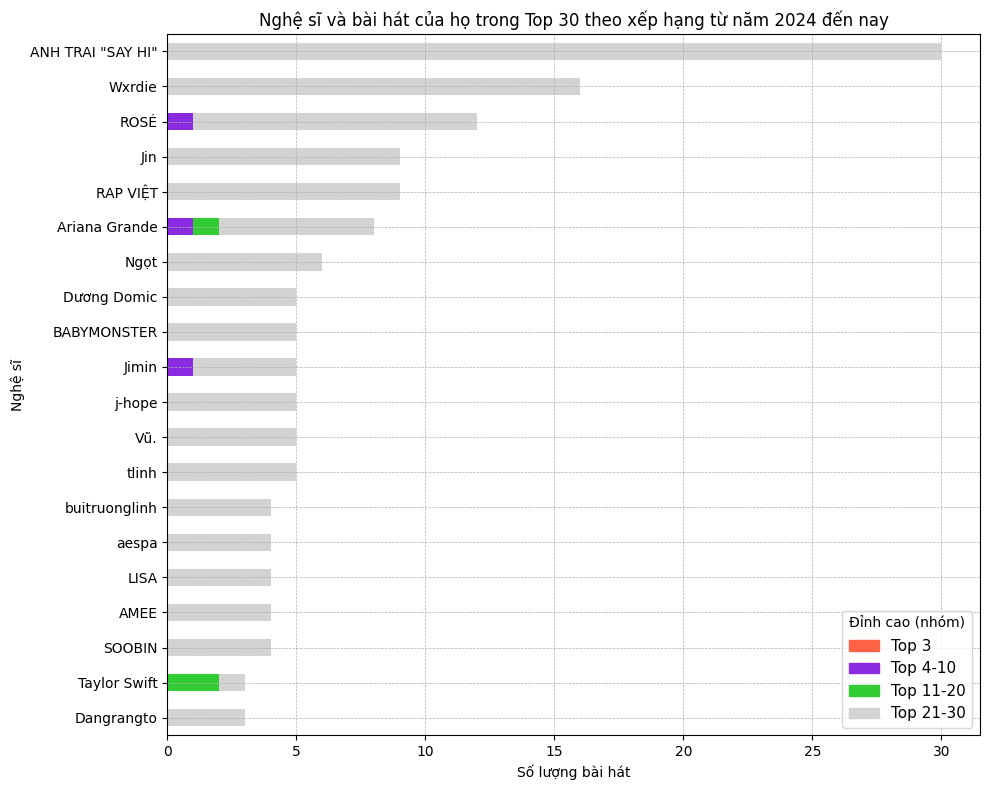

In [84]:
# Chắc chắn rằng cột release_date là datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Lọc lấy bài hát từ năm 2024 trở đi
df_2024_to_now = df[df['release_date'].dt.year >= 2024]

# Sắp xếp theo số lượt nghe
top_30_tracks = df_2024_to_now.sort_values(by='streams', ascending=False)

# Phân loại rank lại
top_30_tracks = top_30_tracks.sort_values(by='streams', ascending=False).reset_index(drop=True)
top_30_tracks['rank'] = top_30_tracks.index + 1

# Tách tên nghệ sĩ
df_exploded = top_30_tracks.assign(artist_names=top_30_tracks['artist_names'].str.split(',')).explode('artist_names')

# Đảm bảo rằng không có khoảng trắng thừa ở đầu hoặc cuối tên nghệ sĩ
df_exploded['artist_names'] = df_exploded['artist_names'].str.strip()

# Nhóm theo nghệ sĩ và xếp hạng, sau đó đếm số lượng bài hát
rank_counts = df_exploded.drop_duplicates('track_name').groupby(['artist_names', 'rank']).size().unstack(fill_value=0)

# Sắp xếp các nghệ sĩ theo tổng số bài
rank_counts['Total'] = rank_counts.sum(axis=1)
rank_counts = rank_counts.sort_values(by='Total', ascending=False).head(20)
rank_counts = rank_counts[::-1]

rank_colors = {
    'Top3': '#FF6347',  
    'Top4-10': '#8A2BE2', 
    'Top11-20': '#32CD32', 
    'Top21-30': '#D3D3D3' 
}

# Ánh xạ màu cho từng xếp hạng
color_mapping = []
for rank in rank_counts.columns[:-1]:  # Loại trừ cột 'Total'
    if int(rank) <= 3:
        color_mapping.append(rank_colors['Top3'])
    elif 4 <= int(rank) <= 10:
        color_mapping.append(rank_colors['Top4-10'])
    elif 11 <= int(rank) <= 20:
        color_mapping.append(rank_colors['Top11-20'])
    else:
        color_mapping.append(rank_colors['Top21-30'])

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))
bars = rank_counts.drop(columns='Total').plot(kind='barh', stacked=True, ax=ax, color=color_mapping)

ax.set_xlabel('Số lượng bài hát')
ax.set_ylabel('Nghệ sĩ')
ax.set_title('Nghệ sĩ và bài hát của họ trong Top 30 theo xếp hạng từ năm 2024 đến nay')

legend_handles = [
    mpatches.Patch(color=rank_colors['Top3'], label='Top 3'),
    mpatches.Patch(color=rank_colors['Top4-10'], label='Top 4-10'),
    mpatches.Patch(color=rank_colors['Top11-20'], label='Top 11-20'),
    mpatches.Patch(color=rank_colors['Top21-30'], label='Top 21-30')
]

ax.legend(handles=legend_handles, title='Đỉnh cao (nhóm)', loc='lower right', bbox_to_anchor=(1, 0), fontsize=11)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Chúng ta có thể thấy, nếu xét từ 2024 đến nay thì số lượng nghệ sĩ Việt Nam có nhiều bài hát nhất nằm trên bảng xếp hạng chiếm ưu thế hơn (21 trên 30 nghệ sĩ) so với nghệ sĩ nước ngoài (chỉ có 9 trên 30 nghệ sĩ). Đồng thời, không chỉ đa dạng về nghệ sĩ mà nghệ sĩ Việt Nam cũng vượt trội hơn về số lượng bài hát với "ANH TRAI "SAY HI"" tận 30 bài hát và Wxrdie với 16 bài hát, trong khi các nghệ sĩ khác chỉ có từ 12 bài hát trở xuống. Phần đông các nghệ sĩ có từ 3 - 5 bài hát lọt vào bảng xếp hạng. Tuy nhiên do khoảng thời gian xét ngắn nên khả năng vượt lên các bài hát vốn từ lâu đã ra mắt có trong bảng xếp hạng là chưa thể, nên ở khoảng thời gian gần đây xét, thì không có bài hát nào nằm ở top 3, nhưng top 4 - 10 thì có 3 bài hát của 3 nghệ sĩ nước ngoài: ROSÉ, Ariana Grande và Jimin, 3 bài top 11 - 20 của Ariana Grande và Taylor Swift. Còn lại thì đều nằm ở top 21 - 30.

Điều đặc biệt là khi xem xét 3 nghệ sĩ Việt có độ phủ nhiều nhất trên bảng xếp hạng thì ta thấy được có 2 nghệ sĩ là ""ANH TRAI "SAY HI"" và "RAP VIỆT" có số lượng bài hát nằm trong top rất nhiều (thứ nhất và thứ năm với 30 bài và 9 bài) và đây hoàn toàn không phải là nghệ sĩ, mà là 2 gameshow. Điều này cho thấy rằng, có vẻ như người nghe đang có xu hướng nghe nhạc từ các gameshow âm nhạc và chúng ta cũng thấy được rõ ràng sức ảnh hưởng cao của các gameshow âm nhạc hiện nay. Hiện nay thì các gameshow này đã hết thúc, tuy nhiên ta có thể thấy rằng các bài hát xuất phát từ gameshow có một sức hút nhất định đối với khán giả Việt Nam. Dù rằng gameshow chỉ diễn ra trong một thời gian ngắn nhưng vẫn có thể tạo ra những bài hát "làm mưa làm gió" kéo dài trong một khoảng thời gian sau đó và thậm chí là có thể cạnh tranh với các bài hát sản xuất bài bản, có chiến lược từ đầu từ các nghệ sĩ. Tuy nhiên, gameshow âm nhạc thì thường quy tụ nhiều nghệ sĩ trong một bài hát và trong cả gameshow. Điều đó làm nhóm đặt vấn đề rằng, có phải hay không số lượng các nghệ sĩ góp mặt vào một bài hát sẽ thu hút người nghe hơn? Điều này sẽ được phân tích ở phần sau (phần 5).

Bên cạnh sự xuất hiện đầy bất ngờ của 2 gameshow đình đám, thì Wxrdie, tuy là đánh lẻ nhưng lại đứng top 2 về số lượng bài hát lọt vào bảng xếp hạng với tạn 16 bài hát. Điều này không bất ngờ lắm vì năm 2024 Wxrdie có dự án phát hành album đầu tay nên số lượng bài hát cao là hiển nhiên. Tuy thế, sự xuất hiện trong top 30 của các bài hát này đã chứng minh rằng Wxrdie đã tạo ra được sự ấn tượng với người nghe Việt Nam và thu hút được sự chú ý của khán giả.

Nhìn chung thì nếu xét toàn bộ bảng xếp hạng từ 2018 đến nay, thì có vẻ sức trụ hạng của các bài hát nước ngoài chiếm ưu thế hơn với độ phủ nhiều hơn. Cho thấy rằng các bài hát nước ngoài gây được tiếng vang lớn ở thị trường Việt Nam và khán giả Việt cũng có sự quan tâm đến âm nhạc quốc tế. Và độ duy trì sức hút của các bài hát quốc tế này là rất cao khi rất hiếm khi có trường hợp bài hát của các nghệ sĩ Việt Nam có thể cạnh tranh lại, cho thấy độ replay đối với khán giả Việt của các bài hát này rất cao mới có thể duy trì thứ hạng lâu như vậy. Tuy nhiên, nếu xét ở khoảng thời gian gần đây nhất, thì sự xuất hiện của các nghệ sĩ Việt Nam đang chiếm ưu thế hơn về số lượng bài hát và độ phủ trên bảng xếp hạng. Điều này cho thấy rằng, có vẻ như người nghe Việt đang có sự quay trở lại với âm nhạc Việt Nam và sự xuất hiện của các gameshow âm nhạc cũng như các nghệ sĩ Việt Nam đang tạo ra được sự chú ý của khán giả. Tuy nhiên, vẫn còn nhiều câu hỏi cần được trả lời như: Liệu sự xuất hiện của nhiều nghệ sĩ trong một bài hát có thu hút người nghe hơn hay không? Vấn đề này sẽ được phân tích ở tiếp theo:

<a id="a5"></a>
## **5. Collab hay solo: Đâu là xu hướng hiện nay?**

<a id="a51"></a>
### **5.1. So sánh giữa số lượng bài hát solo và bài hát hợp tác trên bảng xếp hạng**

Để xác định sự chênh lệch giữa số lượng bài hát solo và bài hát hợp tác, trước hết ta cần phân loại chúng dựa trên việc số lượng nghệ sĩ của từng bài hát là một hay nhiều người. Sau đó, ta sẽ tiến hành thống kê số lượng từng loại bài hát, tổng hợp dữ liệu và trực quan hóa bằng biểu đồ để có cái nhìn rõ ràng hơn về xu hướng sản xuất âm nhạc trên thị trường Việt Nam.

In [10]:
# Xác định bài hát solo và bài hát hợp tác
df['track_type'] = df['artist_names'].apply(lambda x: 'Hợp tác' if ',' in x else 'Solo')

# Đếm số lượng bài hát solo và bài hát hợp tác
comparison_df = df.groupby('track_type').size().reset_index(name='Số lượng bài hát')
comparison_df

,track_type,Số lượng bài hát
0,Hợp tác,1334
1,Solo,2153


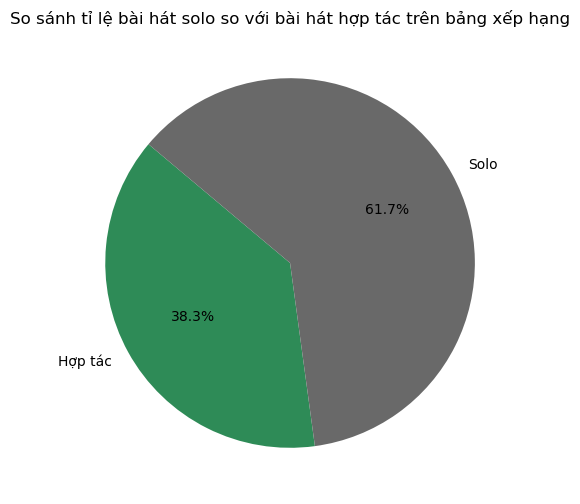

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.pie(comparison_df['Số lượng bài hát'], labels=comparison_df['track_type'], autopct='%1.1f%%', startangle=140, colors=['seagreen', 'dimgray'])
plt.title('So sánh tỉ lệ bài hát solo so với bài hát hợp tác trên bảng xếp hạng')
plt.savefig('../images/pie_solo_collaboration.svg', format='svg')
plt.show()

Từ biểu đồ, ta có thể rút ra một số nhận xét như sau:  
- Bài hát solo chiếm **61.7%**, cao hơn đáng kể so với bài hát hợp tác (**38.3%**).  
- Dù số lượng bài hát solo nhiều hơn, nhưng bài hát hợp tác vẫn chiếm **một phần đáng kể** trên bảng xếp hạng. Điều này cho thấy **việc hợp tác trong ngành âm nhạc Việt Nam không phải là hiếm**, mà là một xu hướng phổ biến.  
- Tuy nhiên, với tỷ lệ cao hơn, có thể thấy nhiều nghệ sĩ vẫn chọn phát hành sản phẩm cá nhân thay vì hợp tác. Điều này có thể do các yếu tố như định hướng âm nhạc riêng, chiến lược thương hiệu cá nhân hoặc sự thuận tiện trong quá trình sản xuất.  

Vì vậy, có thể kết luận rằng việc hợp tác trong âm nhạc không phải là hiếm ở Việt Nam, nhưng các bài hát solo vẫn chiếm tỷ lệ lớn hơn. Liệu solo có phải là hướng đi mà những nghệ sĩ ưu tiên lựa chọn để nâng tầm bài hát của mình, đặc biệt là các nghệ sĩ nổi tiếng, mà nổi tiếng ở đây là đo bằng số lượt nghe của nghệ sĩ đó? Hãy cùng phân tích kĩ hơn ở mục tiếp theo.

<a id='a52'></a>
### **5.2. Có phải nghệ sĩ càng nổi tiếng thì càng nhiều người muốn hợp tác không?**
Để đánh giá mối quan hệ giữa mức độ nổi tiếng của nghệ sĩ và số lần hợp tác, trước hết ta cần xác định mức độ nổi tiếng dựa trên tổng lượt stream cá nhân của nghệ sĩ đó, và so sánh với số liệu về số lần hợp tác của họ. Dữ liệu thu thập sẽ được tổng hợp và trực quan hóa bằng biểu đồ để làm rõ xu hướng: liệu các nghệ sĩ có tổng lượt stream cao có xu hướng hợp tác nhiều hơn hay không, từ đó đưa ra nhận định về tác động của mức độ nổi tiếng đối với số lần hợp tác trong ngành âm nhạc.

In [12]:
# Tính tổng stream của từng nghệ sĩ solo và sắp xếp theo thứ tự giảm dần
solo_df = df[df['track_type'] == 'Solo']
solo_streams = solo_df.groupby('artist_names')['streams'].sum().reset_index()
solo_streams.columns = ['artist', 'total_streams']
solo_streams = solo_streams.sort_values(by='total_streams', ascending=False)

# Đếm số lần hợp tác của nghệ sĩ solo 
collab_df = df[df['track_type'] == 'Hợp tác']
collab_counts = collab_df['artist_names'].str.split(', ').explode().value_counts().reset_index()
collab_counts.columns = ['artist', 'collab_count']

# Kết hợp hai bảng
merged_df = solo_streams.merge(collab_counts, on='artist', how='left').fillna(0)
merged_df['collab_count'] = merged_df['collab_count'].astype(int)
merged_df

,artist,total_streams,collab_count
0,BTS,54492563783,33
1,Taylor Swift,48514847054,20
2,BLACKPINK,20685415047,5
3,Billie Eilish,20628238877,3
4,Ariana Grande,16973193586,22
...,...,...,...
530,Hồ Quang Hiếu,159796,0
531,The Beast,138075,0
532,Beat Record,95830,0
533,The 1975,51841,0


Từ bảng dữ liệu, dễ thấy rằng những nghệ sĩ có tổng lượt stream cá nhân cao thường có xu hướng hợp tác với nghệ sĩ khác, trong khi những nghệ sĩ có ít lượt stream thì không. Để quan sát rõ hơn phân bố này, ta sẽ chọn ra top 20 nghệ sĩ có lượt stream cao nhất và trực quan số lần hợp tác của họ với biểu đồ.

In [13]:
# Chọn top 20 nghệ sĩ có tổng stream cao nhất
top_artists = merged_df.head(20)

# Tạo biểu đồ với subplots để có 2 trục Y
fig = make_subplots(
    rows=1, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.1,
    subplot_titles=["Mối quan hệ giữa độ nổi tiếng và số lần hợp tác"],
    specs=[[{"secondary_y": True}]]
)

# Thêm biểu đồ cột (streams)
fig.add_trace(
    go.Bar(
        x=top_artists['artist'],
        y=top_artists['total_streams'],
        name='Tổng số Streams',
        marker=dict(color='dimgray')
    ),
    row=1, col=1, secondary_y=False
)

# Thêm biểu đồ đường (số lần hợp tác)
fig.add_trace(
    go.Scatter(
        x=top_artists['artist'],
        y=top_artists['collab_count'],
        mode='lines+markers',
        name='Số lần hợp tác',
        line=dict(color='seagreen'),
        marker=dict(color='seagreen')
    ),
    row=1, col=1, secondary_y=True
)

# Cập nhật trục Y thứ nhất và thứ hai
fig.update_yaxes(
    title_text="Tổng số Streams", 
    showgrid=True, 
    row=1, col=1, 
    tickformat=",.0f", 
)
fig.update_yaxes(
    title_text="Số lần hợp tác", 
    showgrid=True, 
    row=1, col=1, 
    tickformat=",.0f", 
    secondary_y=True
)

# Cập nhật trục X 
fig.update_xaxes(
    title_text="Nghệ sĩ", 
    tickangle=45,
    tickmode="array",
    tickvals=top_artists['artist'],
    ticktext=top_artists['artist']
)

fig.update_layout(
    title_text="Mối quan hệ giữa độ nổi tiếng và số lần hợp tác",
    xaxis_title="Nghệ sĩ",
    template="plotly",
    showlegend=True,
    height=600,
)
# fig.write_image('../images/bar_line_collaboration.svg', format='svg', engine='kaleido')
fig.show()

Nhìn chung, biểu đồ thể hiện một số đặc điểm như sau:

- **BTS** và **Taylor Swift** có tổng số lượt stream cao nhất (lần lượt là **54.4 tỷ** và **48.5 tỷ**), nhưng số lần hợp tác của Taylor Swift ít hơn đáng kể so với BTS (**33** so với **20**). Điều này cho thấy không phải nghệ sĩ nào có nhiều lượt stream cũng hợp tác thường xuyên.  

- **Ariana Grande** có số lần hợp tác khá cao (**22** lần) nhưng tổng số streams không quá cao so với top đầu (chỉ ở mức **17 tỷ**).  Ngoài ra, các nghệ sĩ như **Khalid**, **Charlie Puth**, **Ed Sheeran** có nhiều lần hợp tác hơn một số nghệ sĩ có lượt stream cao hơn họ (**>12** lần).  

- **BLACKPINK** và **Billie Eilish** có tổng lượt stream rất cao (**20.7 tỷ**) nhưng số lần hợp tác lại khá ít (**<=5** lần): do lựa chọn chiến lược phát hành nhạc tập trung vào sản phẩm solo thay vì collab, hoặc do số lượng bài hát chưa đáng kể.

- Một số nghệ sĩ Việt Nam như **Mỹ Tâm**, **Sơn Tùng M-TP** cũng có tổng stream đáng kể so với mặt bằng chung (khoảng **1 tỷ**) nhưng số lần hợp tác khá ít (**<=5** lần), phản ánh chiến lược phát triển tập trung vào sản phẩm cá nhân hơn là hợp tác với nghệ sĩ khác.  

Tóm lại, có thể nói rằng tần suất hợp tác không phụ thuộc hoàn toàn vào mức độ nổi tiếng hay thành công của một nghệ sĩ. Một số nghệ sĩ chọn cách phát triển cá nhân với các sản phẩm solo, trong khi những người khác tận dụng hợp tác để mở rộng phạm vi tiếp cận và đa dạng hóa đối tượng khán giả. Nói cách khác, mối quan hệ giữa độ nổi tiếng và số lần hợp tác không phải lúc nào cũng tỷ lệ thuận, mà còn phụ thuộc vào chiến lược và định hướng phát triển của từng nghệ sĩ.  

Chúng ta đã điểm qua nhiều yếu tố để một bài hát thành công, cũng như những yếu tố ảnh hưởng đến sự chọn lựa của người nghe. Tiếp sau đây, chúng ta sẽ đến với vấn đề cuối cùng phải xem xét. Đó chính là:

<a id="a6"></a>
## **6. Xô đổ kỉ lục có khó không: Có phải càng về sau, thời gian để bứt phá tiến vào bảng xếp hạng càng rút ngắn?**

Chúng ta đều biết có những bài hát dù đã xuất hiện từ lâu trên bảng xếp hạng nhưng vẫn không thể bị xô đổ, cũng có những bài hát rất nhanh bứt phá để lọt vào bảng xếp hạng. Tuy nhiên, tiến vào bảng xếp hạng đã khó, vào bảng xếp hạng rồi thì còn khó hơn để giữ vững vị trí của mình và thậm chí là bứt phá lên các vị trí trên. Để có cái nhìn rõ ràng hơn về vấn đề này, chúng ta sẽ cùng đi tìm câu trả lời cho câu hỏi trên.

Đầu tiên, ta sẽ lọc dữ liệu theo từng năm và tính **thời gian trung bình trụ lại trên bảng xếp hạng** của các bài hát theo từng năm ra mắt. Đối với các bài hát có nhiều lần in-out top (vào rồi lại ra khỏi bảng xếp hạng), ta sẽ lấy **thời gian trụ lâu nhất** của bài hát đó trên bảng xếp hạng.

In [14]:
# Chuyển đổi release_date thành kiểu datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Lấy năm phát hành
df['release_year'] = df['release_date'].dt.year

# Lấy giá trị days_on_chart lớn nhất cho mỗi bài hátthatha
df_max_days = df.groupby(['track_name', 'release_year'], as_index=False)['days_on_chart'].max()

# Tính trung bình days_on_chart theo từng năm
yearly_avg_days = df_max_days.groupby('release_year', as_index=False)['days_on_chart'].mean()
yearly_avg_days

,release_year,days_on_chart
0,1957,182.000000
1,1959,11.000000
2,1963,4.000000
3,1975,234.000000
4,1980,142.000000
5,1984,2.000000
6,1985,63.000000
7,1991,2.000000
8,1994,11.000000
9,1995,684.000000


Từ đây, ta sẽ vẽ biểu đồ thể hiện thời gian trung bình các bài hát trụ lại trên bảng xếp hạng theo từng năm, sử dụng đường đồ thị kết hợp với các điểm biểu diễn số ngày trụ lại trung bình của các bài hát ra mắt trong mỗi năm

In [15]:
# Vẽ biểu đồ
fig = px.bar(yearly_avg_days, 
             x='release_year', 
             y='days_on_chart', 
             title="Thời gian trung bình bài hát tồn tại trên BXH theo năm",
             labels={'release_year': 'Năm phát hành', 'days_on_chart': 'Số ngày trên BXH'})

fig.update_traces(marker_color='green')
# fig.write_image('../images/bar_avg_days.svg', format='svg', engine='kaleido')
fig.show()

Nhìn vào biểu đồ, ta có thể thấy một số xu hướng rõ rệt:
- Dữ liệu phân bố không đều theo thời gian, thưa thớt hơn ở những năm **trước 2000** và dày đặc hơn ở những năm **sau 2000**, cho thấy càng ngày càng nhiều xu hướng âm nhạc mới được ra đời để phục vụ khán giả.

- Cột cao nhất vào **năm 1995** phản ánh một sự gia tăng mạnh mẽ trong số ngày các bài hát trụ trên bảng xếp hạng. Có thể nói rằng, phần lớn xu hướng âm nhạc xuất hiện trong những thời kỳ này được giới trẻ ngày nay đặc biệt yêu thích hơn những thời kỳ trước đó, hoặc do sự chuyển mình của nền công nghiệp âm nhạc vào giai đoạn này.

- Sau đỉnh cao vào năm 1995, số ngày trụ trung bình của các bài hát trên bảng xếp hạng có sự giảm sút rõ rệt, tuy nhiên vẫn có sự biến động mạnh, thể hiện qua sự rút ngắn của các cột trong những năm sau đó. Điều này có thể là do bộ dữ liệu hiện tại chưa đầy đủ, chưa phản ánh hết số ngày trụ của các bài hát ra đời những năm gần đây. Một lý do khác có thể là sự bão hòa của các xu hướng âm nhạc, đặc biệt trong bối cảnh xuất hiện ngày càng nhiều những xu hướng âm nhạc mới.

Như vậy, có thể cho rằng việc bứt phá vào bảng xếp hạng không hẳn trở nên dễ dàng hay khó khăn hơn theo thời gian. Thời gian trụ lại của các bài hát trên bảng xếp hạng không chỉ phụ thuộc vào năm phát hành mà còn bị ảnh hưởng bởi nhiều yếu tố tác động khác, như sự thay đổi trong xu hướng âm nhạc, nền tảng phân phối âm nhạc, và sở thích của người nghe.

<a id="conclusion"></a>
# **VII. Kết luận**

Thị trường âm nhạc Việt Nam đang trải qua những thay đổi đáng kể, với sự cạnh tranh mạnh mẽ giữa nhạc Việt và nhạc ngoại. Sự đa dạng trong thể loại, thời lượng và phong cách âm nhạc cho thấy sự phát triển và trưởng thành của thị trường này. Thị hiếu của khán giả lúc bấy giờ không chỉ bị một yếu tố nào chi phối nữa, mà có sự đa dạng hơn về nhu cầu chọn lựa. Sự xuất hiện của các gameshow âm nhạc như một làn gió mới trên thị trường, gây tiếng vang mạnh với khán giả và sự trỗi dậy của nghệ sĩ Việt Nam cho thấy tiềm năng phát triển mạnh mẽ của âm nhạc Việt trong tương lai.

<a id="references"></a>
# **VIII. Trích dẫn**